# Pyres of California

    Our project is to evaluate and analyze California Wildfire Data based on a California Wildfire Incidents dataset between 2013 and 2019. The project will focus on factors such as resources deployed, acreage burned, structure damage, injuries, personnel involved in firefighting and related questions, as the data admits.

**Assumption**

    - California wildfire incidents from 2013 to 2019 and list of California county will be applied in order to conduct the analysis.
    - The analysis will be divided into 2 main parts, all fire incidents and major fire incidents (based on dataset).
    - In each main part, the analysis will focus on resources and the damage of fire by County. 
    - Personnel invloved will represent all the resources in this analysis.

**Hypothesis**

    - Fire incident has a time pattern of occurance
    - Burned time has relation with burned area.
    - Larger area of burn or longer fire duration requires more resources
    - Higher number of fire incidents lead to higher number of injuries

**Area of study**

    - Number of fire incident each month 
    - Correlation between burned time burned (duration of burned) and burned area
    - Correlation between burned time burned (duration of burned) and resources
    - Correlation between burned area (acres) and resources
    - Correlation between resources and injuries

**Data Limitation**
    
    - Data incompletion which will be excluded causes an inaccurate conclusion.
    - The definition of major fire incident in the dataset which indicates by true/false differs from California Fire Department which states that major fire incident is more than 10 arces. The group decision was using the information based on the dataset because we counldn't find the evidence to support if the file is uncredible. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import scipy.stats as st
from scipy.stats import linregress
import gmaps
import datetime
from datetime import date

import folium
from folium.plugins import HeatMap

# Google developer API key
from config import g_key

# Configure gmaps
gmaps.configure(api_key=g_key)

## Import CSV file

In [3]:
# Study data files
fire_data_path = 'output_data/california_fire_cleaned.csv'

# Read in csv file
ca_fire_df = pd.read_csv(fire_data_path)
ca_fire_df.head()

,Counties,AcresBurned,AirTankers,ArchiveYear,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,...,AvgEngines,AvgFatalities,AvgHelicopters,AvgInjuries,AvgPersonnelInvolved,AvgStructuresDamaged,AvgStructuresDestroyed,AvgStructuresEvacuated,AvgStructuresThreatened,AvgWaterTenders
0,Alameda,240.0,NaN,2013.0,1,NaN,NaN,NaN,2013-06-08T13:25:00Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alameda,150.0,NaN,2013.0,1,NaN,NaN,NaN,2013-10-04T10:30:00Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alameda,50.0,NaN,2013.0,1,NaN,NaN,NaN,2013-07-04T11:30:00Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alameda,38.0,NaN,2013.0,1,NaN,NaN,NaN,2013-07-06T14:30:00Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alameda,2700.0,NaN,2015.0,1,NaN,NaN,5.0,2015-08-22T18:30:00Z,NaN,...,5.0,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,1.0


In [4]:
# Converting dtypes
ca_fire_df['ArchiveYear'] = ca_fire_df['ArchiveYear'].map('{:.0f}'.format)

### Statistical Summary

In [5]:
# Drop duplicated data
summary_fire_data = ca_fire_df.drop_duplicates(subset=['UniqueId', 'Days Burned','AcresBurned'])

# Numuric data
area_fire_mean = summary_fire_data['AcresBurned'].mean()
area_fire_variance = summary_fire_data['AcresBurned'].var()
area_fire_standard_dv = summary_fire_data['AcresBurned'].std()
area_fire_sem = summary_fire_data['AcresBurned'].sem()

day_fire_mean = summary_fire_data['Days Burned'].mean()
day_fire_variance = summary_fire_data['Days Burned'].var()
day_fire_standard_dv = summary_fire_data['Days Burned'].std()
day_fire_sem = summary_fire_data['Days Burned'].sem()

air_fire_mean = summary_fire_data['AirTankers'].mean()
air_fire_variance = summary_fire_data['AirTankers'].var()
air_fire_standard_dv = summary_fire_data['AirTankers'].std()
air_fire_sem = summary_fire_data['AirTankers'].sem()

dozer_fire_mean = summary_fire_data['Dozers'].mean()
dozer_fire_variance = summary_fire_data['Dozers'].var()
dozer_fire_standard_dv = summary_fire_data['Dozers'].std()
dozer_fire_sem = summary_fire_data['Dozers'].sem()

engine_fire_mean = summary_fire_data['Engines'].mean()
engine_fire_variance = summary_fire_data['Engines'].var()
engine_fire_standard_dv = summary_fire_data['Engines'].std()
engine_fire_sem = summary_fire_data['Engines'].sem()

fatal_fire_mean = summary_fire_data['Fatalities'].mean()
fatal_fire_variance = summary_fire_data['Fatalities'].var()
fatal_fire_standard_dv = summary_fire_data['Fatalities'].std()
fatal_fire_sem = summary_fire_data['Fatalities'].sem()

hel_fire_mean = summary_fire_data['Helicopters'].mean()
hel_fire_variance = summary_fire_data['Helicopters'].var()
hel_fire_standard_dv = summary_fire_data['Helicopters'].std()
hel_fire_sem = summary_fire_data['Helicopters'].sem()

inj_fire_mean = summary_fire_data['Injuries'].mean()
inj_fire_variance = summary_fire_data['Injuries'].var()
inj_fire_standard_dv = summary_fire_data['Injuries'].std()
inj_fire_sem = summary_fire_data['Injuries'].sem()

per_fire_mean = summary_fire_data['PersonnelInvolved'].mean()
per_fire_variance = summary_fire_data['PersonnelInvolved'].var()
per_fire_standard_dv = summary_fire_data['PersonnelInvolved'].std()
per_fire_sem = summary_fire_data['PersonnelInvolved'].sem()

water_fire_mean = summary_fire_data['WaterTenders'].mean()
water_fire_variance = summary_fire_data['WaterTenders'].var()
water_fire_standard_dv = summary_fire_data['WaterTenders'].std()
water_fire_sem = summary_fire_data['WaterTenders'].sem()

In [6]:
# Summary Dictionary
fire_summary = {
    'Mean': [area_fire_mean, day_fire_mean, air_fire_mean, dozer_fire_mean, engine_fire_mean, fatal_fire_mean, hel_fire_mean, inj_fire_mean, per_fire_mean, water_fire_mean],
    'Variance': [area_fire_variance, day_fire_variance, air_fire_variance, dozer_fire_variance, engine_fire_variance, fatal_fire_variance, hel_fire_variance, inj_fire_variance, per_fire_variance, water_fire_variance],
    'Standard DEV': [area_fire_standard_dv, day_fire_standard_dv, air_fire_standard_dv, dozer_fire_standard_dv, engine_fire_standard_dv, fatal_fire_standard_dv, hel_fire_standard_dv, inj_fire_standard_dv, per_fire_standard_dv, water_fire_standard_dv],
    'SEM': [area_fire_sem, area_fire_sem, area_fire_sem, dozer_fire_sem, engine_fire_sem, fatal_fire_sem, hel_fire_sem, inj_fire_sem, per_fire_sem, water_fire_sem]
}

# Summary index
index = ['Acres Burned', 'Days Burned', 'Air Tankers', 'Dozers', 'Engines', 'Fatalities', 'Helicopters', 'Injuries', 'Personnel Involves', 'Water Tenders']

# Create a dataframe to hold the result
fire_summary_df = pd.DataFrame(data=fire_summary, index=index)

fire_summary_df.round(4)

,Mean,Variance,Standard DEV,SEM
Acres Burned,3245.1865,3.492430e+08,18688.0434,466.7637
Days Burned,84.7880,7.818796e+05,884.2396,466.7637
Air Tankers,4.0714,4.095770e+01,6.3998,466.7637
Dozers,6.1949,1.085514e+02,10.4188,0.9591
Engines,21.2649,1.138391e+03,33.7401,2.4806
Fatalities,10.8462,5.289744e+02,22.9994,6.3789
Helicopters,5.0494,4.907250e+01,7.0052,0.7784
Injuries,3.6055,1.563000e+01,3.9535,0.3787
Personnel Involves,301.4315,1.994728e+05,446.6237,31.8206
Water Tenders,6.6596,8.952610e+01,9.4618,0.7968


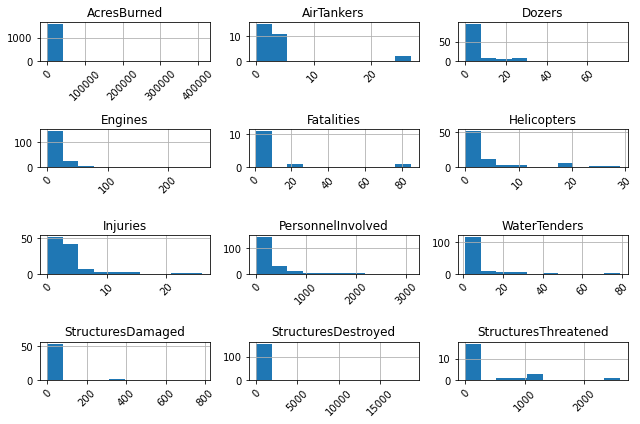

In [7]:
fire_hist = summary_fire_data[['AcresBurned',
                               'AirTankers', 
                               'Dozers', 
                               'Engines', 
                               'Fatalities', 
                               'Helicopters', 
                               'Injuries', 
                               'PersonnelInvolved',
                               'WaterTenders', 
                               'StructuresDamaged', 
                               'StructuresDestroyed', 
                               'StructuresThreatened']].hist(figsize=(9,6), xrot=45)

plt.tight_layout()

plt.savefig('Images/hist_data_plot.png')

plt.show()

## All fire incidents

### Pattern

In [8]:
# All fire incidents
fire_count = ca_fire_df.groupby('ArchiveYear')['UniqueId'].count()
fire_mean = ca_fire_df.groupby('ArchiveYear')['AvgAcresBurned'].mean()
fire_sum = ca_fire_df.groupby('ArchiveYear')['AvgAcresBurned'].sum()

# Create a dataframe to hold the result
fire_summary_df = pd.DataFrame({"Number of fire incidents": fire_count,
                                "Total Acreage Burned": fire_sum,
                                'Average Acreage Burned': fire_mean
                                })
                                    
# Give the displayed data cleaner formatting
fire_summary_df["Total Acreage Burned"] = fire_summary_df["Total Acreage Burned"].round(2)
fire_summary_df["Average Acreage Burned"] = fire_summary_df["Average Acreage Burned"].round(2)

# Change index name
fire_summary_df.index.name = 'Year'

# Present data
fire_summary = fire_summary_df.dropna()
fire_summary

,Number of fire incidents,Total Acreage Burned,Average Acreage Burned
Year,,,
2013,162,523152.0,3229.33
2014,117,440175.0,3762.18
2015,152,542385.0,3568.32
2016,185,500281.0,2704.22
2017,438,1365219.0,3116.94
2018,316,1549401.0,4903.17
2019,262,281421.0,1086.57


In [9]:
# Change data type and sort by month
fire_trend_df = ca_fire_df.dropna(how='any', subset=['Started Month'])
fire_trend = fire_trend_df.sort_values('Started Month', ascending=True)

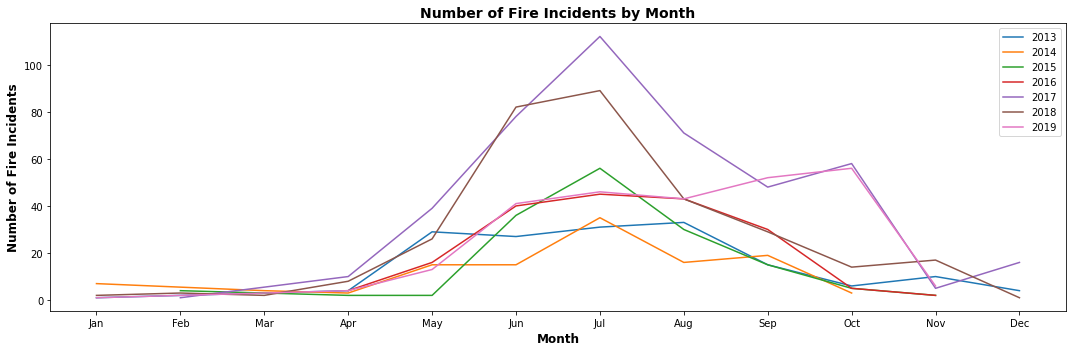

In [106]:
# Generating line chart for each year 
fire_trend_2013 = fire_trend.loc[fire_trend['ArchiveYear'] == '2013']
fire_per_month_2013 = fire_trend_2013['Started Month'].value_counts().sort_index()
plot_2013, = plt.plot(fire_per_month_2013)

fire_trend_2014 = fire_trend.loc[fire_trend['ArchiveYear'] == '2014']
fire_per_month_2014 = fire_trend_2014['Started Month'].value_counts().sort_index()
plot_2014, = plt.plot(fire_per_month_2014)

fire_trend_2015 = fire_trend.loc[fire_trend['ArchiveYear'] == '2015']
fire_per_month_2015 = fire_trend_2015['Started Month'].value_counts().sort_index()
plot_2015, = plt.plot(fire_per_month_2015)

fire_trend_2016 = fire_trend.loc[fire_trend['ArchiveYear'] == '2016']
fire_per_month_2016 = fire_trend_2016['Started Month'].value_counts().sort_index()
plot_2016, = plt.plot(fire_per_month_2016)

fire_trend_2017 = fire_trend.loc[fire_trend['ArchiveYear'] == '2017']
fire_per_month_2017 = fire_trend_2017['Started Month'].value_counts().sort_index()
plot_2017, = plt.plot(fire_per_month_2017)

fire_trend_2018 = fire_trend.loc[fire_trend['ArchiveYear'] == '2018']
fire_per_month_2018 = fire_trend_2018['Started Month'].value_counts().sort_index()
plot_2018, = plt.plot(fire_per_month_2018)

fire_trend_2019 = fire_trend.loc[fire_trend['ArchiveYear'] == '2019']
fire_per_month_2019 = fire_trend_2019['Started Month'].value_counts().sort_index()
plot_2019, = plt.plot(fire_per_month_2019)

# Set xtick and legend
positions = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
labels = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
plt.xticks(positions, labels)
plt.legend([plot_2013,plot_2014,plot_2015,plot_2016,plot_2017,plot_2018,plot_2019], 
            ['2013','2014','2015','2016','2017','2018','2019'], loc='best')

# Set image size
plt.rcParams["figure.figsize"] = (15,5)

# Set x/y label, title
plt.title(f'Number of Fire Incidents by Month', fontweight='bold', fontsize=14)
plt.xlabel('Month', fontweight='bold', fontsize=12)
plt.ylabel('Number of Fire Incidents', fontweight='bold', fontsize=12)

# Set image size
plt.tight_layout()

# Save chart to Images folder
plt.savefig('Images/PatternbyMonth.png')

# Present the chart
plt.show()

# To close pyplot
plt.close()


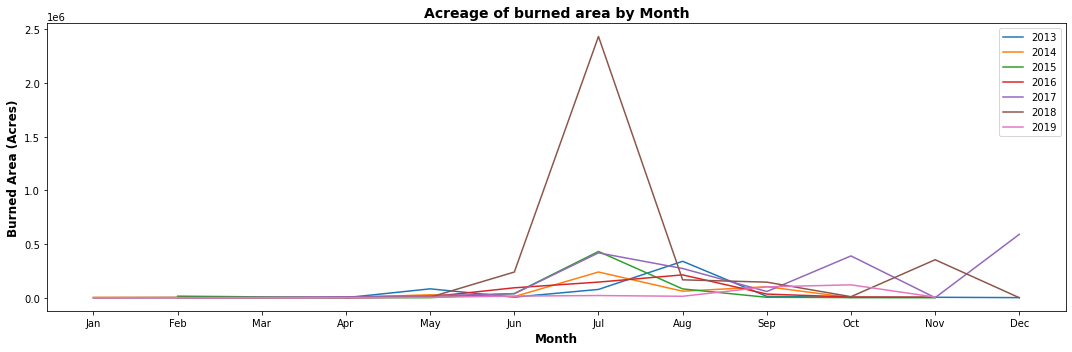

In [11]:
# Generating line chart for each year 
groub_month_2013 = fire_trend_2013.groupby('Started Month')
arces_per_month_2013 = groub_month_2013['AcresBurned'].sum()
a_plot_2013, = plt.plot(arces_per_month_2013)

groub_month_2014 = fire_trend_2014.groupby('Started Month')
arces_per_month_2014 = groub_month_2014['AcresBurned'].sum()
a_plot_2014, = plt.plot(arces_per_month_2014)

groub_month_2015 = fire_trend_2015.groupby('Started Month')
arces_per_month_2015 = groub_month_2015['AcresBurned'].sum()
a_plot_2015, = plt.plot(arces_per_month_2015)

groub_month_2016 = fire_trend_2016.groupby('Started Month')
arces_per_month_2016 = groub_month_2016['AcresBurned'].sum()
a_plot_2016, = plt.plot(arces_per_month_2016)

groub_month_2017 = fire_trend_2017.groupby('Started Month')
arces_per_month_2017 = groub_month_2017['AcresBurned'].sum()
a_plot_2017, = plt.plot(arces_per_month_2017)

groub_month_2018 = fire_trend_2018.groupby('Started Month')
arces_per_month_2018 = groub_month_2018['AcresBurned'].sum()
a_plot_2018, = plt.plot(arces_per_month_2018)

groub_month_2019 = fire_trend_2019.groupby('Started Month')
arces_per_month_2019 = groub_month_2019['AcresBurned'].sum()
a_plot_2019, = plt.plot(arces_per_month_2019)

# Set xtick and legend
positions = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
labels = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
plt.xticks(positions, labels)
plt.legend([a_plot_2013,a_plot_2014,a_plot_2015,a_plot_2016,a_plot_2017,a_plot_2018,a_plot_2019], 
            ['2013','2014','2015','2016','2017','2018','2019'], loc='best')

# Set image size
plt.rcParams["figure.figsize"] = (15,5)

# Set x/y label, title
plt.title(f'Acreage of burned area by Month', fontweight='bold', fontsize=14)
plt.xlabel('Month', fontweight='bold', fontsize=12)
plt.ylabel('Burned Area (Acres)', fontweight='bold', fontsize=12)

# Set image size
plt.tight_layout()

# Save chart to Images folder
plt.savefig('Images/PatternbyMonth_arces.png')

# Present the chart
plt.show()

# To close pyplot
plt.close()

### Resources dispatched by year

In [12]:
# Drop na in column Year
resource_drop = ca_fire_df.loc[ca_fire_df['ArchiveYear'] == 'nan']
resource_drop_index = resource_drop.index
resource_all_df = ca_fire_df.drop(resource_drop_index)

In [13]:
# Collecting data to plot
resources_watertenders_count = resource_all_df.groupby("ArchiveYear").count()["WaterTenders"]
resources_engines_count = resource_all_df.groupby("ArchiveYear").count()["Engines"]
resources_dozers_count = resource_all_df.groupby("ArchiveYear").count()["Dozers"]
resources_crew_count = resource_all_df.groupby("ArchiveYear").count()["CrewsInvolved"]
resources_personnel_count = resource_all_df.groupby("ArchiveYear").count()["PersonnelInvolved"]

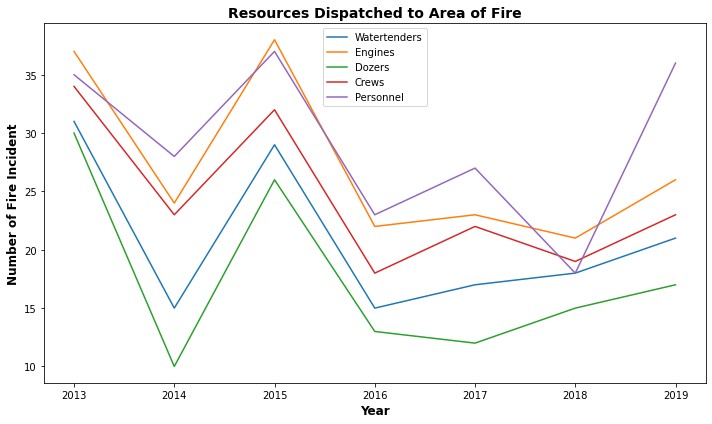

In [14]:
# Plot graph
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(resources_watertenders_count.index.values, resources_watertenders_count.values)
ax.plot(resources_engines_count.index.values, resources_engines_count.values)
ax.plot(resources_dozers_count.index.values, resources_dozers_count.values)
ax.plot(resources_crew_count.index.values, resources_crew_count.values)
ax.plot(resources_personnel_count.index.values, resources_personnel_count.values)
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Number of Fire Incident", fontsize=12, fontweight='bold')
plt.title("Resources Dispatched to Area of Fire", fontsize=14, fontweight='bold')
ax.legend(["Watertenders", "Engines", "Dozers", "Crews", "Personnel"], loc='best')

# Set image size
plt.tight_layout()

# Save chart to Images folder
plt.savefig('Images/resources_no_fire.png')

# Present the chart
plt.show()

# To close pyplot
plt.close()

In [15]:
resources_watertenders_sum = resource_all_df.groupby(["ArchiveYear"]).sum()["WaterTenders"]
resources_engines_sum = resource_all_df.groupby(["ArchiveYear"]).sum()["Engines"]
resources_dozers_sum = resource_all_df.groupby(["ArchiveYear"]).sum()["Dozers"]
resources_crew_sum = resource_all_df.groupby(["ArchiveYear"]).sum()["CrewsInvolved"]

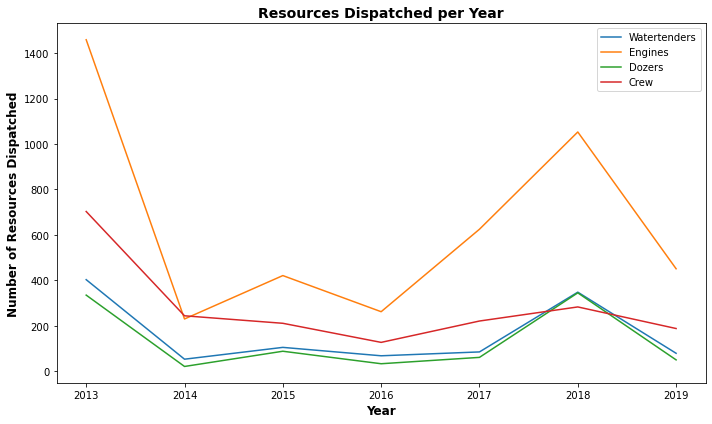

In [16]:
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(resources_watertenders_sum.index.values, resources_watertenders_sum.values)
ax.plot(resources_engines_sum.index.values, resources_engines_sum.values)
ax.plot(resources_dozers_sum.index.values, resources_dozers_sum.values)
ax.plot(resources_crew_sum.index.values, resources_crew_sum.values)
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Number of Resources Dispatched", fontsize=12, fontweight='bold')
plt.title("Resources Dispatched per Year", fontsize=14, fontweight='bold')
ax.legend(["Watertenders", "Engines", "Dozers", "Crew"])

# Set image size
plt.tight_layout()

# Save chart to Images folder
plt.savefig('Images/no_resources_fire.png')

# Present the chart
plt.show()

# To close pyplot
plt.close()

### Top 10 Bottom 10

#### Number of fire incidents

Counties
Riverside          146
San Diego           89
Butte               66
San Luis Obispo     64
Shasta              64
Kern                62
Fresno              57
Siskiyou            57
San Bernardino      53
Tehama              51
Name: UniqueId, dtype: int64


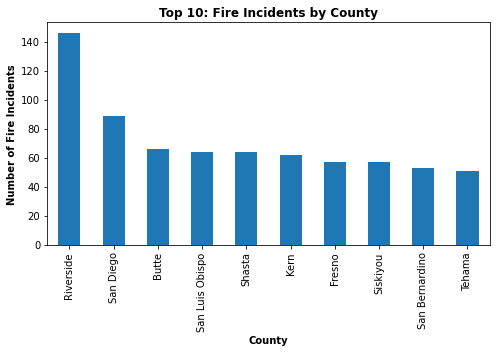

In [110]:
#Top ten counties for all fire incidents
all_top_10_df = ca_fire_df.groupby('Counties')['UniqueId'].count().sort_values(ascending=False)
all_top_ten_counties = all_top_10_df.head(10)

# Generate a bar plot
all_top10_bar = all_top_ten_counties.plot(kind="bar", legend=False)

# Set x/y label, title
all_top10_bar.set_title(label='Top 10: Fire Incidents by County', fontweight = 'bold')
all_top10_bar.set_xlabel('County', fontweight = 'bold')
all_top10_bar.set_ylabel('Number of Fire Incidents', fontweight = 'bold')

# Set image size
plt.rcParams["figure.figsize"] = (7,5)

# Save bar graph to Images folder
plt.tight_layout()
all_top10_bar.figure.savefig('Images/bar_top_ca_all_fire.png')

# Present the bar chart with data
print(all_top_ten_counties)
plt.show()

# To close pyplot
plt.close()

Counties
San Francisco    0
Imperial         0
Alpine           2
Sierra           2
Sutter           3
San Mateo        3
Santa Cruz       4
Kings            5
Marin            6
Colusa           6
Name: UniqueId, dtype: int64


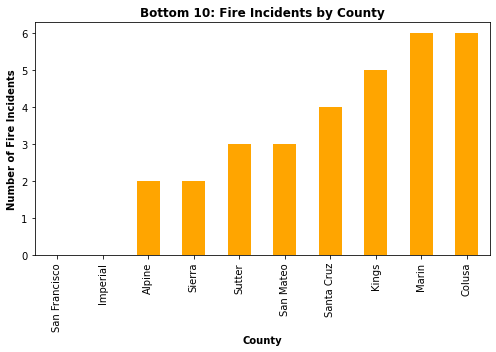

In [19]:
# Bottom ten counties for all fire incidents
all_bottom_10_df = ca_fire_df.groupby('Counties')['UniqueId'].count().sort_values(ascending=True)
all_bottom_ten_counties = all_bottom_10_df.head(10)

# Generate a bar plot
all_bottom10_bar = all_bottom_ten_counties.plot(kind="bar", legend=False, color='orange')

# Set x/y label, title
all_bottom10_bar.set_title(label='Bottom 10: Fire Incidents by County', fontweight = 'bold')
all_bottom10_bar.set_xlabel('County', fontweight = 'bold')
all_bottom10_bar.set_ylabel('Number of Fire Incidents', fontweight = 'bold')

# Save bar graph to Images folder
plt.tight_layout()
all_bottom10_bar.figure.savefig('Images/bar_bottom_ca_all_fire.png')

# Present the bar chart with data
print(all_bottom_ten_counties)
plt.show()

# To close pyplot
plt.close()

#### Area burned

Counties
Siskiyou         367914.000000
Trinity          334567.000000
Shasta           302046.000000
Tuolumne         299132.000000
Ventura          236710.000000
Lake             227788.416667
Santa Barbara    221621.500000
Mariposa         217852.000000
Fresno           214411.000000
Butte            190702.000000
Name: AvgAcresBurned, dtype: float64


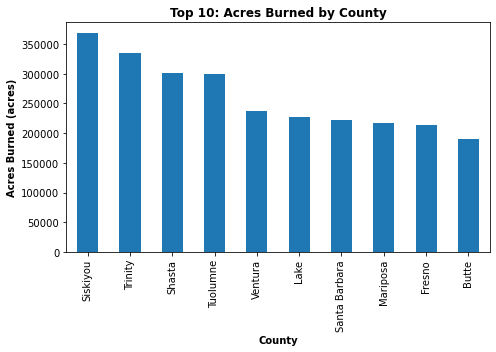

In [20]:
#Top ten counties for all fire incidents
area_all_top_10_df = ca_fire_df.groupby('Counties')['AvgAcresBurned'].sum().sort_values(ascending=False)
area_all_top_ten_counties = area_all_top_10_df.head(10)

# Generate a bar plot
area_all_top10_bar = area_all_top_ten_counties.plot(kind="bar", legend=False)

# Set x/y label, title
area_all_top10_bar.set_title(label='Top 10: Acres Burned by County', fontweight = 'bold')
area_all_top10_bar.set_xlabel('County', fontweight = 'bold')
area_all_top10_bar.set_ylabel('Acres Burned (acres)', fontweight = 'bold')

# Save bar graph to Images folder
plt.tight_layout()
area_all_top10_bar.figure.savefig('Images/bar_top_ca_area_all_fire.png')

# Present the bar chart with data
print(area_all_top_ten_counties)
plt.show()

# To close pyplot
plt.close()

Counties
Alpine              0.0
San Francisco       0.0
Imperial            0.0
San Mateo         153.0
Marin             349.0
Santa Cruz        428.0
Sierra            915.0
Sacramento       1903.5
Calaveras        2648.0
Sutter           2850.0
Name: AvgAcresBurned, dtype: float64


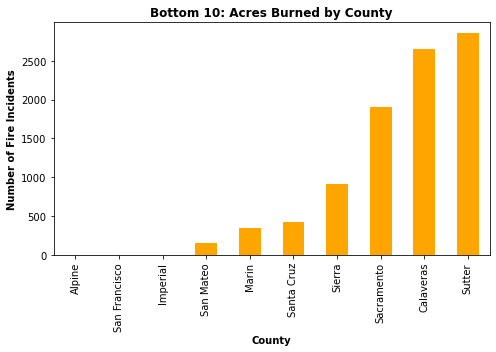

In [111]:
# Bottom ten counties for all fire incidents (area burned)
all_bottom_ten_area_df = ca_fire_df.groupby('Counties')['AvgAcresBurned'].sum().sort_values(ascending=True)
all_bottom_ten_area_counties = all_bottom_ten_area_df.head(10)

# Generate a bar plot
all_bottom_ten_area_counties_bar = all_bottom_ten_area_counties.plot(kind="bar", legend=False, color='orange')

# Set x/y label, title
all_bottom_ten_area_counties_bar.set_title(label='Bottom 10: Acres Burned by County', fontweight = 'bold')
all_bottom_ten_area_counties_bar.set_xlabel('County', fontweight = 'bold')
all_bottom_ten_area_counties_bar.set_ylabel('Number of Fire Incidents', fontweight = 'bold')

# Save bar graph to Images folder
plt.tight_layout()
all_bottom_ten_area_counties_bar.figure.savefig('Images/bar_bottom_ca_area all_fire.png')

# Present the bar chart with data
print(all_bottom_ten_area_counties)
plt.show()

# To close pyplot
plt.close()

### Correlation

### All fire incidents

In [22]:
# Duplicated data removed process
final_burned_df = ca_fire_df.drop_duplicates(subset=['UniqueId', 'Days Burned','AcresBurned'])

In [23]:
# Correlation for all data
df_corr = final_burned_df.corr(method='pearson')

# Export to excel
df_corr.to_excel('output_data/correlation.xlsx', engine='xlsxwriter')

In [24]:
# Show correlation df
df_corr.head()

,AcresBurned,AirTankers,CrewsInvolved,Dozers,Engines,Fatalities,Helicopters,Injuries,Latitude,Longitude,...,AvgEngines,AvgFatalities,AvgHelicopters,AvgInjuries,AvgPersonnelInvolved,AvgStructuresDamaged,AvgStructuresDestroyed,AvgStructuresEvacuated,AvgStructuresThreatened,AvgWaterTenders
AcresBurned,1.000000,0.087599,0.076175,0.400498,0.227666,0.119278,0.033276,0.010991,-0.003875,-0.000883,...,0.190648,0.126649,-0.015248,-0.028850,0.191833,0.392112,0.274183,NaN,-0.011934,0.159330
AirTankers,0.087599,1.000000,0.602916,0.779673,0.430673,NaN,0.824106,0.799003,-0.018584,-0.022760,...,0.430673,NaN,0.824106,0.799003,0.434371,0.887242,0.572404,NaN,-0.076033,0.802913
CrewsInvolved,0.076175,0.602916,1.000000,0.639358,0.743474,0.676507,0.685521,0.479059,-0.045201,0.015377,...,0.736669,0.684758,0.637084,0.477878,0.790451,-0.122544,-0.018754,NaN,0.174583,0.775252
Dozers,0.400498,0.779673,0.639358,1.000000,0.686336,-0.498782,0.767998,0.230624,0.081399,-0.088961,...,0.508597,-0.512323,0.634347,0.244295,0.494610,0.113483,-0.043987,NaN,0.025299,0.796786
Engines,0.227666,0.430673,0.743474,0.686336,1.000000,0.995691,0.495020,0.652464,-0.018484,-0.017472,...,0.929485,0.996771,0.389788,0.653774,0.836329,-0.026623,0.103314,NaN,0.123541,0.676768


#### Final Size Burned (acres) vs Time Burned (days)

Number of data is: 1538
The correlation between burned area (acres) and burned days is 0.0576
The r-squared is: 0.003317674


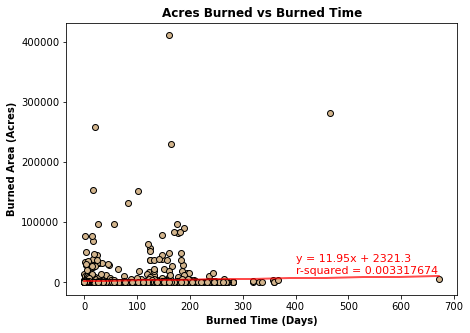

In [25]:
# Get data from dataframe to plot (Condition applied in order to filter wrong data and missing input data)
# ['Days Burned']>=0) >> Missing ended date
# ['Days Burned']<1000 >> Wrong year entered 
area = final_burned_df.loc[(final_burned_df['Days Burned']>=0) & (final_burned_df['Days Burned']<1000), 'AcresBurned']
days = final_burned_df.loc[(final_burned_df['Days Burned']>=0) & (final_burned_df['Days Burned']<1000), 'Days Burned']

# Number of data
num_data_areatime = len(days)
print(f'Number of data is: {num_data_areatime}')

# Define x,y values
area_x_values = days
area_y_values = area

# Calculate the correlation
area_correlation = round(st.pearsonr(area_x_values, area_y_values)[0],5)
print(f"The correlation between burned area (acres) and burned days is {area_correlation}")

# Calculate linear regression values
(area_slope, area_intercept, area_rvalue, area_pvalue, area_stderr) = st.linregress(area_x_values, area_y_values)

# Calculate r-squared
area_r_squared = round(area_rvalue**2,9)
print(f"The r-squared is: {area_r_squared}")

# y = mx + b
area_regress_values = area_x_values * area_slope + area_intercept
area_line_eq = "y = " + str(round(area_slope,2)) + "x + " + str(round(area_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(area_x_values, area_y_values, edgecolors='black', color='tan')
plt.plot(area_x_values,area_regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(area_line_eq,(400,35000), fontsize=11, color="red")
plt.annotate(f'r-squared = {area_r_squared}', (400,15000), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Acres Burned vs Burned Time', fontweight='bold')
plt.xlabel('Burned Time (Days)', fontweight='bold')
plt.ylabel('Burned Area (Acres)', fontweight='bold')

# Set image size
fig = (7,5)
plt.rcParams["figure.figsize"] = fig

# Save box plot graph to Images folder
plt.savefig('Images/day_area.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

#### Time Burned (days) vs Resources(Personnel Involved)

**Assumption:**

Correlation between Personnel Involved and Air Tankers, Crews, Dozers, Engines, Helicopters, Water Tender are moderate or strong which means there is a relation among those variables. Also, to dispatch any resources requires at least 1 person to operate. Therefore, the study will use Personnel Involved represents all others equipment to find the relation between number of fire incidents and resources.

In [26]:
df_corr.loc[['AirTankers','CrewsInvolved', 'Dozers', 'Engines', 'Helicopters', 'WaterTenders'], 'PersonnelInvolved']

AirTankers       0.434371
CrewsInvolved    0.803128
Dozers           0.674363
Engines          0.922547
Helicopters      0.512676
WaterTenders     0.738906
Name: PersonnelInvolved, dtype: float64

In [27]:
# Drop Null from column of interest (resources: personnel involved)
per_inv_df = final_burned_df.dropna(how='any', subset=['PersonnelInvolved'])

Number of data is: 197
The correlation between burned time (days) and personnel involved is 0.06
The r-squared is: 0.00349


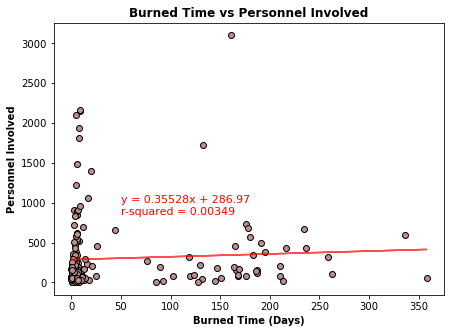

In [28]:
# Number of data
num_data_pertime = per_inv_df[['PersonnelInvolved']].count()
print(f'Number of data is: {num_data_pertime[0]}')

# Get data from dataframe to plot
per_inv_t = per_inv_df.loc[(per_inv_df['Days Burned']>=0) & (per_inv_df['Days Burned']<1000), 'PersonnelInvolved']
pt_days = per_inv_df.loc[(per_inv_df['Days Burned']>=0) & (per_inv_df['Days Burned']<1000), 'Days Burned']

# Define x, y values
pt_x_values = pt_days
pt_y_values = per_inv_t

# Calculate the correlation
pt_correlation = round(st.pearsonr(pt_x_values, pt_y_values)[0],2)
print(f"The correlation between burned time (days) and personnel involved is {pt_correlation}")

# Calculate linear regression values
(pt_slope, pt_intercept, pt_rvalue, pt_pvalue, pt_stderr) = st.linregress(pt_x_values, pt_y_values) 
                                                                                                   
# Calculate r-squared
pt_r_squared = round(pt_rvalue**2,5)
print(f"The r-squared is: {pt_r_squared}")

# y = mx + b
pt_regress_values = pt_x_values * pt_slope + pt_intercept
pt_line_eq = "y = " + str(round(pt_slope,5)) + "x + " + str(round(pt_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(pt_x_values, pt_y_values, edgecolors='black', color='rosybrown')
plt.plot(pt_x_values,pt_regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(pt_line_eq,(50,1000), fontsize=11, color="red")
plt.annotate(f'r-squared = {pt_r_squared}', (50,850), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Burned Time vs Personnel Involved', fontweight='bold')
plt.xlabel('Burned Time (Days)', fontweight='bold')
plt.ylabel('Personnel Involved', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig('Images/time_perinv.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

**Burned Area (acres) vs Resources (Personnel Involved)**

Number of data is: 197
The correlation between burned time (days) and personnel involved is 0.24
The r-squared is: 0.05984


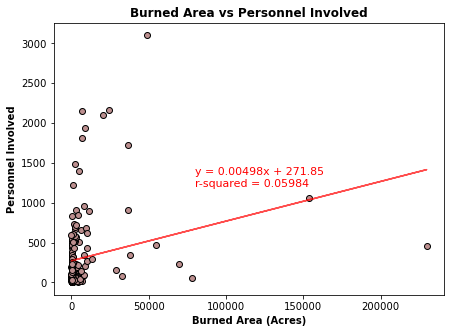

In [29]:
# Number of data
num_data_perarea = per_inv_df[['PersonnelInvolved']].count()
print(f'Number of data is: {num_data_perarea[0]}')

# Get data from dataframe to plot
per_inv_a = per_inv_df['PersonnelInvolved']
pa_area = per_inv_df['AcresBurned']

# Define x, y values
pa_x_values = pa_area
pa_y_values = per_inv_a

# Calculate the correlation
pa_correlation = round(st.pearsonr(pa_x_values, pa_y_values)[0],2)
print(f"The correlation between burned time (days) and personnel involved is {pa_correlation}")

# Calculate linear regression values
(pa_slope, pa_intercept, pa_rvalue, pa_pvalue, pa_stderr) = st.linregress(pa_x_values, pa_y_values) 
                                                                                                   
# Calculate r-squared
pa_r_squared = round(pa_rvalue**2,5)
print(f"The r-squared is: {pa_r_squared}")

# y = mx + b
pa_regress_values = pa_x_values * pa_slope + pa_intercept
pa_line_eq = "y = " + str(round(pa_slope,5)) + "x + " + str(round(pa_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(pa_x_values, pa_y_values, edgecolors='black', color='rosybrown')
plt.plot(pa_x_values,pa_regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(pa_line_eq,(80000,1350), fontsize=11, color="red")
plt.annotate(f'r-squared = {pa_r_squared}', (80000,1200), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Burned Area vs Personnel Involved', fontweight='bold')
plt.xlabel('Burned Area (Acres)', fontweight='bold')
plt.ylabel('Personnel Involved', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig('Images/area_perinv.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

#### Injuries vs Resources (Personnel Involved)

In [30]:
# Drop Null from column of interest
per_inj_df = final_burned_df.dropna(how='any', subset=['PersonnelInvolved', 'Injuries'])

Number of data is: 80
The correlation between perines and injuries is 0.58
The r-squared is: 0.34192


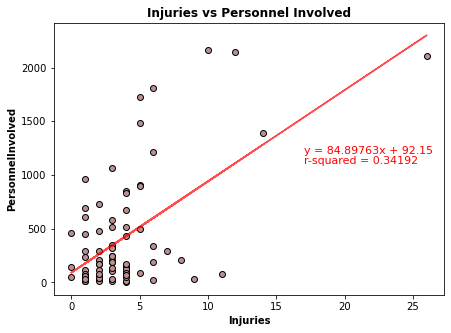

In [31]:
# Number of data
num_data_perinj = per_inj_df[['PersonnelInvolved']].count()
print(f'Number of data is: {num_data_perinj[0]}')

# Get data from dataframe to plot
all_per = per_inj_df['PersonnelInvolved']
all_inj = per_inj_df['Injuries']

# Define x, y values
perinj_x_values = all_inj
perinj_y_values = all_per

# Calculate the correlation
perinj_correlation = round(st.pearsonr(perinj_x_values, perinj_y_values)[0],2)
print(f"The correlation between perines and injuries is {perinj_correlation}")

# Calculate linear regression values
(perinj_slope, perinj_intercept, perinj_rvalue, perinj_pvalue, perinj_stderr) = st.linregress(perinj_x_values, perinj_y_values) 
                                                                                                   
# Calculate r-squared
perinj_r_squared = round(perinj_rvalue**2,5)
print(f"The r-squared is: {perinj_r_squared}")

# y = mx + b
perinj_regress_values = perinj_x_values * perinj_slope + perinj_intercept
perinj_line_eq = "y = " + str(round(perinj_slope,5)) + "x + " + str(round(perinj_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(perinj_x_values, perinj_y_values, edgecolors='black', color='rosybrown')
plt.plot(perinj_x_values,perinj_regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(perinj_line_eq,(17,1200), fontsize=11, color="red")
plt.annotate(f'r-squared = {perinj_r_squared}', (17,1100), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Injuries vs Personnel Involved', fontweight='bold')
plt.xlabel('Injuries', fontweight='bold')
plt.ylabel('PersonnelInvolved', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig('Images/all_per_inj.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

### By county

In [32]:
# Calculation per county
all_number = ca_fire_df.groupby('Counties')['AvgAcresBurned'].count()
all_area = ca_fire_df.groupby('Counties')['AvgAcresBurned'].sum()
all_days = ca_fire_df.groupby('Counties')['Days Burned'].sum()
all_air = ca_fire_df.groupby('Counties')['AvgAirTankers'].sum()
all_crews = ca_fire_df.groupby('Counties')['AvgCrewsInvolved'].sum()
all_dozers = ca_fire_df.groupby('Counties')['AvgDozers'].sum()
all_engines = ca_fire_df.groupby('Counties')['AvgEngines'].sum()
all_fat = ca_fire_df.groupby('Counties')['AvgFatalities'].sum()
all_helic = ca_fire_df.groupby('Counties')['AvgHelicopters'].sum()
all_inju = ca_fire_df.groupby('Counties')['AvgInjuries'].sum()
all_person = ca_fire_df.groupby('Counties')['AvgPersonnelInvolved'].sum()
all_dam = ca_fire_df.groupby('Counties')['AvgStructuresDamaged'].sum()
all_des = ca_fire_df.groupby('Counties')['AvgStructuresDestroyed'].sum()
all_thre = ca_fire_df.groupby('Counties')['AvgStructuresThreatened'].sum()
all_water = ca_fire_df.groupby('Counties')['AvgWaterTenders'].sum()

# Put data into data frame
all_fire_county_df = pd.DataFrame({
    'Number of Fire Incident': all_number,
    'Area Burned (acres)': all_area,
    'Day Burned (days)': all_days,
    'Air Tanker': all_air,
    'Crews': all_crews,
    'Dozers': all_dozers,
    'Engines': all_engines,
    'Fatalities': all_fat,
    'Helicopters': all_helic,
    'Injuries': all_inju,
    'Personnel Involved': all_person,
    'StructuresDamaged': all_dam,
    'StructuresDestroyed': all_des,
    'StructuresThreatened': all_thre,
    'WaterTenders': all_water
})

all_fire_county_df.head()

,Number of Fire Incident,Area Burned (acres),Day Burned (days),Air Tanker,Crews,Dozers,Engines,Fatalities,Helicopters,Injuries,Personnel Involved,StructuresDamaged,StructuresDestroyed,StructuresThreatened,WaterTenders
Counties,,,,,,,,,,,,,,,
Alameda,32,6387.0,2007.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,18.0,0.0,1.0,0.0,1.0
Alpine,2,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amador,13,4165.0,536.0,4.0,14.5,7.0,60.5,0.0,3.0,2.0,215.0,0.0,34.5,0.0,15.5
Butte,66,190702.0,5275.0,14.0,135.0,76.0,405.0,85.0,32.0,23.0,6176.0,63.0,19021.0,0.0,91.0
Calaveras,22,2648.0,1392.0,0.0,18.0,18.0,35.0,0.0,18.0,4.0,189.0,1.0,9.0,0.0,18.0


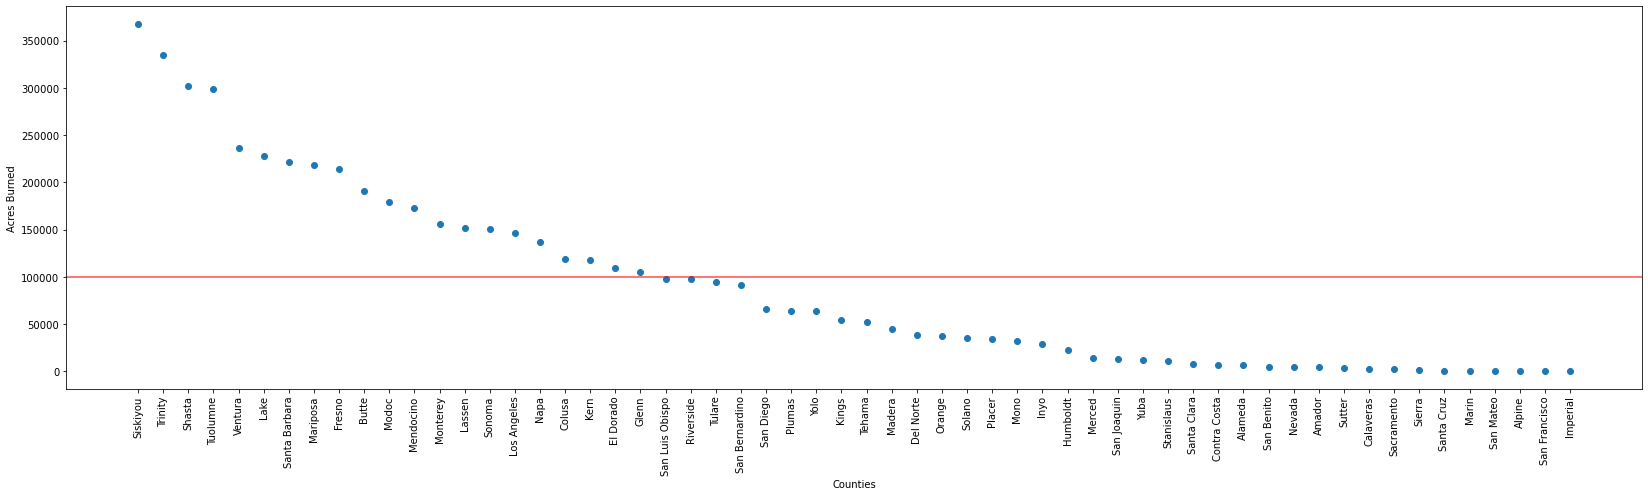

Siskiyou County has the largest number of acres burned 367914.0 acres


In [35]:
all_area_plot = all_fire_county_df.sort_values("Area Burned (acres)", ascending = 0)

#  "Acres Burned" vs "Counties" Scatter plotScatter plot
plt.scatter(all_area_plot.index, all_area_plot.iloc[:,1])
plt.axhline(y=100000, color='red', alpha=0.7)

# Set x/y axis and title
plt.xticks( rotation='vertical')
plt.xlabel("Counties")
plt.ylabel("Acres Burned")
plt.tight_layout()
plt.rc("figure",figsize=(23, 7))

# Save figure
plt.savefig('Images/all_area_scatter_showall.png')

plt.show()

p1 = all_fire_county_df['Area Burned (acres)'].idxmax()
p2 = all_fire_county_df['Area Burned (acres)'].max()


print(f"{p1} County has the largest number of acres burned {p2} acres")

In [36]:
# Calculate correlation for groupby county data
all_fire_county_corr = all_fire_county_df.corr(method='pearson')

# Export to excel
all_fire_county_corr.to_excel('output_data/county_correlation.xlsx', engine='xlsxwriter')

#### Number of fire incident vs Area burned

Number of data is: 58
The correlation between number of fire incidents and area burned is 0.41312
The r-squared is: 0.17067


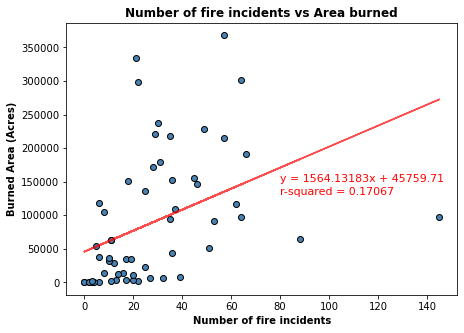

In [38]:
# Number of data
num_data_numarea = all_fire_county_df['Number of Fire Incident'].count()
print(f'Number of data is: {num_data_numarea}')

# Get data from dataframe to plot
num_fire = all_fire_county_df['Number of Fire Incident']
area_fire = all_fire_county_df['Area Burned (acres)']

# Define x, y values
numarea_x_values = num_fire
numarea_y_values = area_fire

# Calculate the correlation
numarea_correlation = round(st.pearsonr(numarea_x_values, numarea_y_values)[0],5)
print(f"The correlation between number of fire incidents and area burned is {numarea_correlation}")

# Calculate linear regression values
(numarea_slope, numarea_intercept, numarea_rvalue, numarea_pvalue, numarea_stderr) = st.linregress(numarea_x_values, numarea_y_values) 
                                                                                                   
# Calculate r-squared
numarea_r_squared = round(numarea_rvalue**2,5)
print(f"The r-squared is: {numarea_r_squared}")

# y = mx + b
numarea_regress_values = numarea_x_values * numarea_slope + numarea_intercept
numarea_line_eq = "y = " + str(round(numarea_slope,5)) + "x + " + str(round(numarea_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(numarea_x_values, numarea_y_values, edgecolors='black', color='steelblue')
plt.plot(numarea_x_values, numarea_regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(numarea_line_eq,(80,150000), fontsize=11, color="red")
plt.annotate(f'r-squared = {numarea_r_squared}', (80,130000), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Number of fire incidents vs Area burned', fontweight='bold')
plt.xlabel('Number of fire incidents', fontweight='bold')
plt.ylabel('Burned Area (Acres)', fontweight='bold')

# Set image size
plt.rcParams["figure.figsize"] = (7,5)

# Save box plot graph to Images folder
plt.savefig('Images/area_num.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

#### Number of fire incidents vs Personnel Involved

**Assumption:**

Correlation between *Personnel Involved* and *Air Tankers, Crews, Dozers, Engines, Helicopters, Water Tender* are close to 1 which means there is a strong relation among those variable. Therefore, the study will use *Personnel Involved* represents all others equipment to find the relation between number of fire incidents and resources.

In [39]:
all_fire_county_corr['Personnel Involved']

Number of Fire Incident    0.701836
Area Burned (acres)        0.301342
Day Burned (days)          0.267921
Air Tanker                 0.681176
Crews                      0.947085
Dozers                     0.887918
Engines                    0.944860
Fatalities                 0.430954
Helicopters                0.882184
Injuries                   0.693365
Personnel Involved         1.000000
StructuresDamaged          0.118340
StructuresDestroyed        0.456058
StructuresThreatened       0.013991
WaterTenders               0.912711
Name: Personnel Involved, dtype: float64

Number of data is: 58
The correlation between number of fire incidents and area burned is 0.70184
The r-squared is: 0.49257


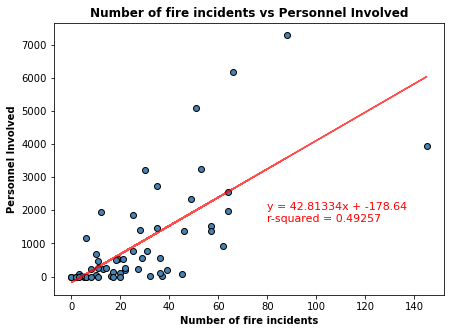

In [40]:
# Number of data
num_data_numper = all_fire_county_df['Personnel Involved'].count()
print(f'Number of data is: {num_data_numper}')

# Get data from dataframe to plot
per_fire = all_fire_county_df['Personnel Involved']
num_fire = all_fire_county_df['Number of Fire Incident']

# Define x, y values
numper_x_values = num_fire
numper_y_values = per_fire

# Calculate the correlation
numper_correlation = round(st.pearsonr(numper_x_values, numper_y_values)[0],5)
print(f"The correlation between number of fire incidents and area burned is {numper_correlation}")

# Calculate linear regression values
(numper_slope, numper_intercept, numper_rvalue, numper_pvalue, numper_stderr) = st.linregress(numper_x_values, numper_y_values) 
                                                                                                   
# Calculate r-squared
numper_r_squared = round(numper_rvalue**2,5)
print(f"The r-squared is: {numper_r_squared}")

# y = mx + b
numper_regress_values = numper_x_values * numper_slope + numper_intercept
numper_line_eq = "y = " + str(round(numper_slope,5)) + "x + " + str(round(numper_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(numper_x_values, numper_y_values, edgecolors='black', color='steelblue')
plt.plot(numper_x_values, numper_regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(numper_line_eq,(80,2000), fontsize=11, color="red")
plt.annotate(f'r-squared = {numper_r_squared}', (80,1650), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Number of fire incidents vs Personnel Involved', fontweight='bold')
plt.xlabel('Number of fire incidents', fontweight='bold')
plt.ylabel('Personnel Involved', fontweight='bold')

# Set image size
plt.rcParams["figure.figsize"] = (7,5)

# Save box plot graph to Images folder
plt.savefig('Images/per_num.png')

# Present the box plot chart
plt.show()

The correlation between personnel involved and injuries is 0.69337


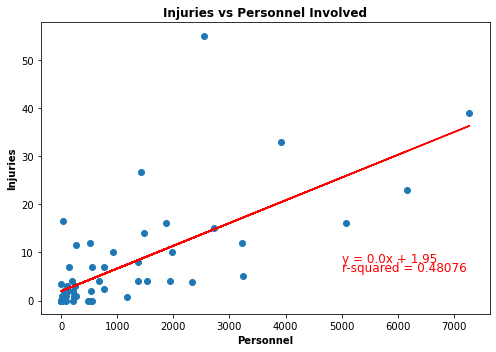

In [41]:
#  "Injuries" and "Personnel" Scatter plot with linear regression equation and line to plot

pi_x_values = all_fire_county_df['Personnel Involved']
pi_y_values = all_fire_county_df['Injuries']

pi_correlation = round(st.pearsonr(pi_x_values, pi_y_values)[0],5)
print(f"The correlation between personnel involved and injuries is {pi_correlation}")

(pi_slope, pi_intercept, pi_rvalue, pi_pvalue, pi_stderr) = st.linregress(pi_x_values, pi_y_values)
pi_regress_values = pi_x_values * pi_slope + pi_intercept
pi_line_eq = "y = " + str(round(pi_slope,2)) + "x + " + str(round(pi_intercept,2))

plt.scatter(pi_x_values,pi_y_values)

plt.title('Injuries vs Personnel Involved', fontweight='bold')
plt.plot(pi_x_values,pi_regress_values,"r-")
plt.annotate(pi_line_eq,(5000,8), fontsize=12, color="red")
plt.annotate(f'r-squared = {round(pi_rvalue**2,5)}', (5000,6), fontsize=12, color="red")

plt.xlabel('Personnel', fontweight='bold')
plt.ylabel('Injuries', fontweight='bold')

plt.tight_layout()
plt.savefig('Images/per_inj_ales.png')

plt.show()

The correlation between personnel involved and injuries is 0.72047


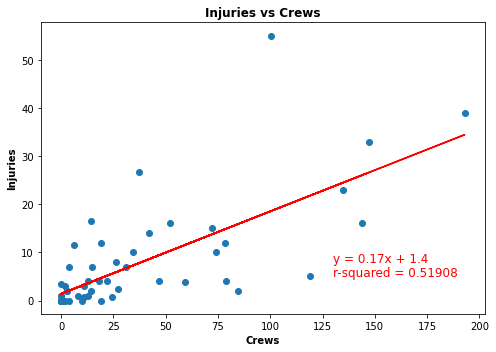

In [42]:
#  "Injuries" and "Personnel" Scatter plot with linear regression equation and line to plot

ci_x_values = all_fire_county_df['Crews']
ci_y_values = all_fire_county_df['Injuries']

ci_correlation = round(st.pearsonr(ci_x_values, ci_y_values)[0],5)
print(f"The correlation between personnel involved and injuries is {ci_correlation}")

(ci_slope, ci_intercept, ci_rvalue, ci_pvalue, ci_stderr) = st.linregress(ci_x_values, ci_y_values)
ci_regress_values = ci_x_values * ci_slope + ci_intercept
ci_line_eq = "y = " + str(round(ci_slope,2)) + "x + " + str(round(ci_intercept,2))

plt.scatter(ci_x_values,ci_y_values)

plt.title('Injuries vs Crews', fontweight='bold')
plt.plot(ci_x_values,ci_regress_values,"r-")
plt.annotate(ci_line_eq,(130,8), fontsize=12, color="red")
plt.annotate(f'r-squared = {round(ci_rvalue**2,5)}', (130,5), fontsize=12, color="red")
plt.xlabel('Crews', fontweight='bold')
plt.ylabel('Injuries', fontweight='bold')

plt.tight_layout()
plt.savefig('Images/crews_inj.png')

plt.show()

In [43]:
#list of county names
county_names = ca_fire_df["Counties"].unique()

#count unique fires with UniqueID
all_fire_count = ca_fire_df.groupby("Counties")["UniqueId"].nunique()

#count days burned 
all_days_burned = ca_fire_df.groupby("Counties")["Days Burned"].sum()

#count 'Helicopters' involved
all_helicopter_count = ca_fire_df.groupby("Counties")["AvgHelicopters"].sum()

#count dozers involved
all_dozer_count = ca_fire_df.groupby("Counties")["AvgDozers"].sum()

#count engines involved 
all_engine_count = ca_fire_df.groupby("Counties")["AvgEngines"].sum()

#count water tankers involved
all_water_tender_count = ca_fire_df.groupby("Counties")["AvgWaterTenders"].sum()

#count personnel involved 
all_personnel_count = ca_fire_df.groupby("Counties")["AvgPersonnelInvolved"].sum()

#count crews involved
all_crew_count = ca_fire_df.groupby("Counties")["AvgCrewsInvolved"].sum()

#total equipment involved, found with average columns
all_total_equipment = all_helicopter_count + all_dozer_count + all_engine_count + all_water_tender_count 

#create a new dataframe 
all_resources_df = pd.DataFrame({"Fire Count": all_fire_count, 
                            "Days Burned": all_days_burned,
                            "Helicopters": all_helicopter_count,
                            "Dozers": all_dozer_count, 
                            "Engines": all_engine_count, 
                            "Water Tenders": all_water_tender_count, 
                            "Personnel Involved": all_personnel_count,
                            "Crews Involved": all_crew_count, 
                            "Total Equipment": all_total_equipment})


all_resources_df_sorted = all_resources_df.sort_values(by= ["Fire Count"], ascending= False)
all_resources_df_sorted.head(5).round(2)

,Fire Count,Days Burned,Helicopters,Dozers,Engines,Water Tenders,Personnel Involved,Crews Involved,Total Equipment
Counties,,,,,,,,,
Riverside,146,13805.0,31.0,39.0,433.0,39.0,3925.0,147.0,542.0
San Diego,89,6727.0,72.0,83.0,399.0,101.0,7278.0,193.0,655.0
Butte,66,5275.0,32.0,76.0,405.0,91.0,6176.0,135.0,604.0
Shasta,64,4416.0,28.0,54.0,197.5,79.5,2540.0,100.5,359.0
San Luis Obispo,64,6768.0,9.0,15.0,168.0,21.0,1973.0,74.0,213.0


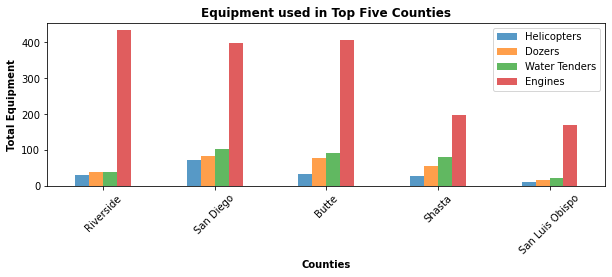

In [44]:
# Graph the resources used by county
all_equipment_county_df = all_resources_df_sorted.head(5)[["Helicopters","Dozers","Water Tenders","Engines"]]
all_equipment_county_df.plot(kind="bar", stacked=False, rot=45, alpha=0.75, figsize=(10,3))

# Set title, x/y label and legend
plt.title("Equipment used in Top Five Counties", fontweight = 'bold')
plt.xlabel("Counties", fontweight = 'bold')
plt.ylabel("Total Equipment", fontweight = 'bold')
plt.legend( loc='best')

# Save figure
plt.savefig("Images/Bar_Chart_Equipment_Top_Five_Counties_all.png")
plt.show()

### Major Fire Incidents

In [45]:
# Major fire incident
major_fire_df = ca_fire_df.loc[ca_fire_df['MajorIncident']==True]

# Store clean data in csv file
major_fire_df.to_csv('output_data/major_fire.csv', index=False, header=True)
major_fire_df.head()

,Counties,AcresBurned,AirTankers,ArchiveYear,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,...,AvgEngines,AvgFatalities,AvgHelicopters,AvgInjuries,AvgPersonnelInvolved,AvgStructuresDamaged,AvgStructuresDestroyed,AvgStructuresEvacuated,AvgStructuresThreatened,AvgWaterTenders
4,Alameda,2700.0,NaN,2015,1,NaN,NaN,5.0,2015-08-22T18:30:00Z,NaN,...,5.0,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,1.0
15,Alameda,640.0,NaN,2018,1,NaN,NaN,NaN,2019-01-04T09:53:00Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Amador,4240.0,NaN,2014,3;9,1.0,NaN,3.0,2014-08-02T19:15:00Z,NaN,...,1.5,NaN,NaN,1.0,20.0,NaN,33.5,NaN,NaN,0.5
36,Amador,355.0,NaN,2015,3,1.0,2.0,13.0,2015-07-02T06:36:00Z,NaN,...,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
39,Amador,210.0,NaN,2016,3,NaN,NaN,NaN,2016-06-21T18:30:00Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Calculation
mj_burn_mean = major_fire_df.groupby('Counties')['AvgAcresBurned'].mean()
mj_burn_median = major_fire_df.groupby('Counties')['AvgAcresBurned'].median()
mj_burn_variance = major_fire_df.groupby('Counties')['AvgAcresBurned'].var()
mj_burn_standard_dv = major_fire_df.groupby('Counties')['AvgAcresBurned'].std()
mj_burn_sem = major_fire_df.groupby('Counties')['AvgAcresBurned'].sem()

# Create a dataframe to hold the result
mj_burn_summary_df = pd.DataFrame({"Acres Burned Mean": mj_burn_mean, 
                                   "Acres Burned Median": mj_burn_median, 
                                   "Acres Burned VAR": mj_burn_variance, 
                                   "Acres Burned STD": mj_burn_standard_dv,
                                   "Acres Burned SEM": mj_burn_sem
                                  })
                                    
# Give the displayed data cleaner formatting
mj_burn_summary_df["Acres Burned Mean"] = mj_burn_summary_df["Acres Burned Mean"].map('{:,.2f}'.format)
mj_burn_summary_df["Acres Burned Median"] = mj_burn_summary_df["Acres Burned Median"].map('{:,.2f}'.format)
mj_burn_summary_df["Acres Burned STD"] = mj_burn_summary_df["Acres Burned STD"].map('{:,.2f}'.format)
mj_burn_summary_df["Acres Burned SEM"] = mj_burn_summary_df["Acres Burned SEM"].map('{:,.2f}'.format)

# Present data
mj_burn_summary_df.head()

,Acres Burned Mean,Acres Burned Median,Acres Burned VAR,Acres Burned STD,Acres Burned SEM
Counties,,,,,
Alameda,"1,670.00","1,670.00",2.121800e+06,"1,456.64","1,030.00"
Amador,451.25,127.50,5.313285e+05,728.92,257.71
Butte,"6,531.11",224.00,8.323339e+08,"28,850.20","5,452.17"
Calaveras,122.10,84.00,1.404010e+04,118.49,37.47
Colusa,"19,838.24",72.50,1.684248e+09,"41,039.59","16,754.34"


Counties
Butte        28
San Diego    27
Shasta       26
Lake         21
Riverside    18
Napa         16
El Dorado    15
Mariposa     14
Fresno       12
Tehama       11
Name: UniqueId, dtype: int64


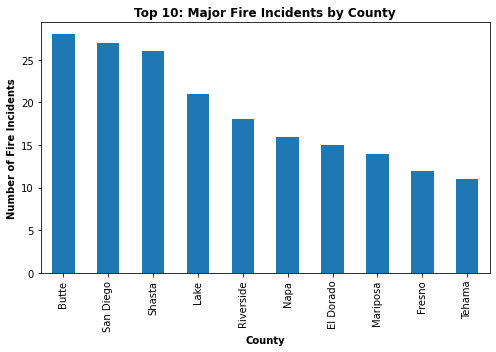

In [47]:
#Top ten counties for major fire incidents
mj_top_10_df = major_fire_df.groupby('Counties')['UniqueId'].count().sort_values(ascending=False)
mj_top_ten_counties = mj_top_10_df.head(10)

# Generate a bar plot
mj_top10_bar = mj_top_ten_counties.plot(kind="bar", legend=False)

# Set x/y label, title
mj_top10_bar.set_title(label='Top 10: Major Fire Incidents by County', fontweight = 'bold')
mj_top10_bar.set_xlabel('County', fontweight = 'bold')
mj_top10_bar.set_ylabel('Number of Fire Incidents', fontweight = 'bold')

# Save bar graph to Images folder
plt.tight_layout()
mj_top10_bar.figure.savefig('Images/bar_top_ca_mj_fire.png')

# Present the bar chart with data
print(mj_top_ten_counties)
plt.show()

# To close pyplot
plt.close()

Counties
San Mateo      1
Sacramento     1
Orange         1
Mono           1
Merced         1
Marin          1
Kings          1
Alameda        2
Santa Cruz     2
Santa Clara    2
Name: UniqueId, dtype: int64


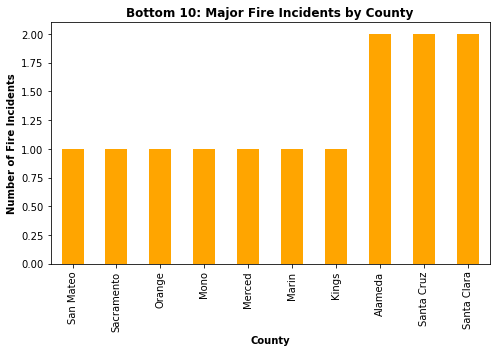

In [119]:
# Find last ten counties for major fire incidents
mj_bottom_10_df = major_fire_df.groupby('Counties')['UniqueId'].count().sort_values(ascending=True)
mj_last_ten_counties = mj_bottom_10_df.head(10)


# Generate a bar plot
mj_bottom10_bar = mj_last_ten_counties.plot(kind="bar", legend=False, color='orange')

# Set x/y label, title
mj_bottom10_bar.set_title(label='Bottom 10: Major Fire Incidents by County', fontweight = 'bold')
mj_bottom10_bar.set_xlabel('County', fontweight = 'bold')
mj_bottom10_bar.set_ylabel('Number of Fire Incidents', fontweight = 'bold')

# Save bar graph to Images folder
plt.tight_layout()
mj_bottom10_bar.figure.savefig('Images/bar_bottom_mj_fire.png')

# Present the bar chart with data
print(mj_last_ten_counties)
plt.show()

# To close pyplot
plt.close()

Counties
Ventura          230375.000000
Lake             225975.416667
Shasta           222486.500000
Butte            182871.000000
Mendocino        169672.416667
Santa Barbara    149165.500000
Sonoma           148948.500000
Monterey         137538.000000
Napa             135812.500000
Colusa           119029.416667
Name: AvgAcresBurned, dtype: float64


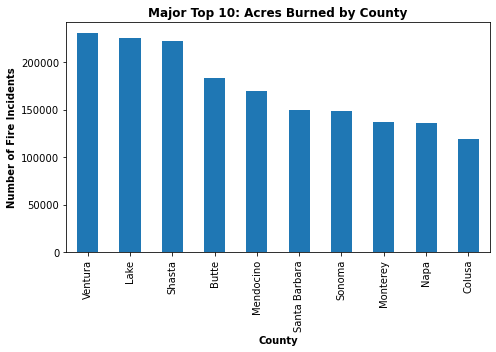

In [49]:
#Top ten counties for mj fire incidents
area_mj_top_10_df = major_fire_df.groupby('Counties')['AvgAcresBurned'].sum().sort_values(ascending=False)
area_mj_top_ten_counties = area_mj_top_10_df.head(10)

# Generate a bar plot
area_mj_top10_bar = area_mj_top_ten_counties.plot(kind="bar", legend=False)

# Set x/y label, title
area_mj_top10_bar.set_title(label='Major Top 10: Acres Burned by County', fontweight = 'bold')
area_mj_top10_bar.set_xlabel('County', fontweight = 'bold')
area_mj_top10_bar.set_ylabel('Number of Fire Incidents', fontweight = 'bold')

# Save bar graph to Images folder
plt.tight_layout()
area_mj_top10_bar.figure.savefig('Images/bar_top_ca_area_mj_fire.png')

# Present the bar chart with data
print(area_mj_top_ten_counties)
plt.show()

# To close pyplot
plt.close()

Counties
San Mateo       50.0
Sacramento     110.0
Marin          152.0
Santa Cruz     408.0
Calaveras     1221.0
Merced        1333.0
Tuolumne      2330.0
San Benito    2734.0
Lassen        2784.0
Alameda       3340.0
Name: AvgAcresBurned, dtype: float64


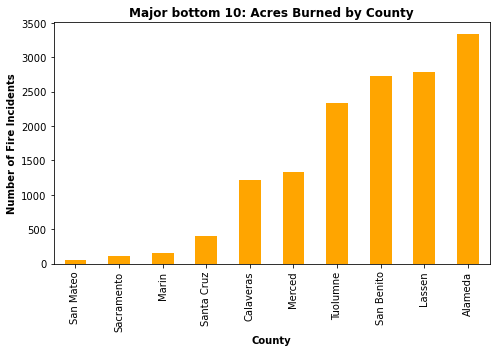

In [113]:
# Bottom ten counties for mj fire incidents
area_mj_bottom_10_df = major_fire_df.groupby('Counties')['AvgAcresBurned'].sum().sort_values(ascending=True)
area_mj_bottom_ten_counties = area_mj_bottom_10_df.head(10)

# Generate a bar plot
area_mj_bottom10_bar = area_mj_bottom_ten_counties.plot(kind="bar", legend=False, color='orange')

# Set x/y label, title
area_mj_bottom10_bar.set_title(label='Major bottom 10: Acres Burned by County', fontweight = 'bold')
area_mj_bottom10_bar.set_xlabel('County', fontweight = 'bold')
area_mj_bottom10_bar.set_ylabel('Number of Fire Incidents', fontweight = 'bold')

# Save bar graph to Images folder
plt.tight_layout()
area_mj_bottom10_bar.figure.savefig('Images/bar_bottom_ca_area_mj_fire.png')

# Present the bar chart with data
print(area_mj_bottom_ten_counties)
plt.show()

# To close pyplot
plt.close()

#### Resources Dispatched

In [51]:
# Drop na in column Year
mj_resource_drop = major_fire_df.loc[major_fire_df['ArchiveYear'] == 'nan']
mj_resource_drop_index = mj_resource_drop.index
mj_resource_all_df = major_fire_df.drop(mj_resource_drop_index)

In [52]:
resources_watertenders_major_count = mj_resource_all_df.groupby(["ArchiveYear"]).count()["WaterTenders"]
resources_dozer_major_count = mj_resource_all_df.groupby(["ArchiveYear"]).count()["Dozers"]
resources_engines_major_count = mj_resource_all_df.groupby(["ArchiveYear"]).count()["Engines"]
resources_crew_major_count = mj_resource_all_df.groupby(["ArchiveYear"]).count()["CrewsInvolved"]
resources_personnel_major_count = mj_resource_all_df.groupby(["ArchiveYear"]).count()["PersonnelInvolved"]

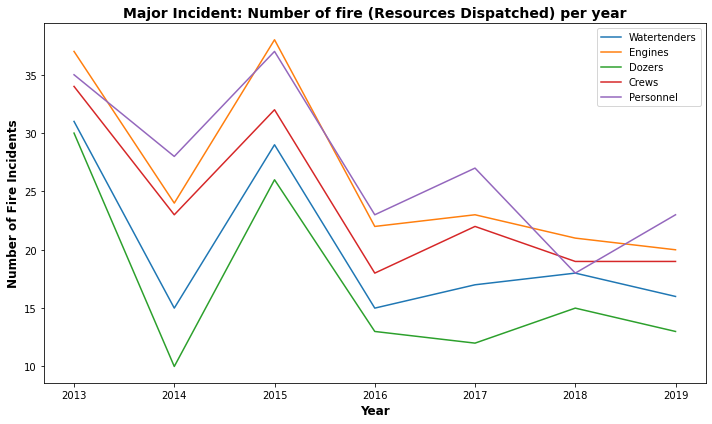

In [130]:
fig1, ax=plt.subplots(figsize=(10,6))
ax.plot(resources_watertenders_major_count.index.values, resources_watertenders_major_count.values)
ax.plot(resources_engines_major_count.index.values, resources_engines_major_count.values)
ax.plot(resources_dozer_major_count.index.values, resources_dozer_major_count.values)
ax.plot(resources_crew_major_count.index.values, resources_crew_major_count.values)
ax.plot(resources_personnel_major_count.index.values, resources_personnel_major_count.values)

plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Number of Fire Incidents", fontsize=12, fontweight='bold')
plt.title("Major Incident: Number of fire (Resources Dispatched) per year", fontsize=14, fontweight='bold')

ax.legend(["Watertenders", "Engines", "Dozers", "Crews", "Personnel"])

plt.tight_layout()
plt.savefig('Images/mj_resources_no_fire.png')


plt.show()

In [56]:
resources_watertenders_major_sum = mj_resource_all_df.groupby(["ArchiveYear"]).sum()["WaterTenders"]
resources_dozer_major_sum = mj_resource_all_df.groupby(["ArchiveYear"]).sum()["Dozers"]
resources_engines_major_sum = mj_resource_all_df.groupby(["ArchiveYear"]).sum()["Engines"]
resources_crew_major_sum = mj_resource_all_df.groupby(["ArchiveYear"]).sum()["CrewsInvolved"]

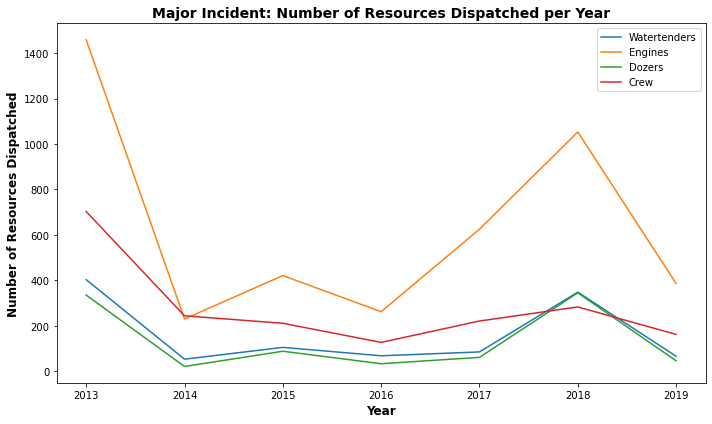

In [132]:
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(resources_watertenders_major_sum.index.values, resources_watertenders_major_sum.values)
ax.plot(resources_engines_major_sum.index.values, resources_engines_major_sum.values)
ax.plot(resources_dozer_major_sum.index.values, resources_dozer_major_sum.values)
ax.plot(resources_crew_major_sum.index.values, resources_crew_major_sum.values)
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Number of Resources Dispatched", fontsize=12, fontweight='bold')
plt.title("Major Incident: Number of Resources Dispatched per Year", fontsize=14, fontweight='bold')

ax.legend(["Watertenders", "Engines", "Dozers", "Crew"])

plt.tight_layout()
plt.savefig('Images/mj_no_resources_fire.png')


plt.show()

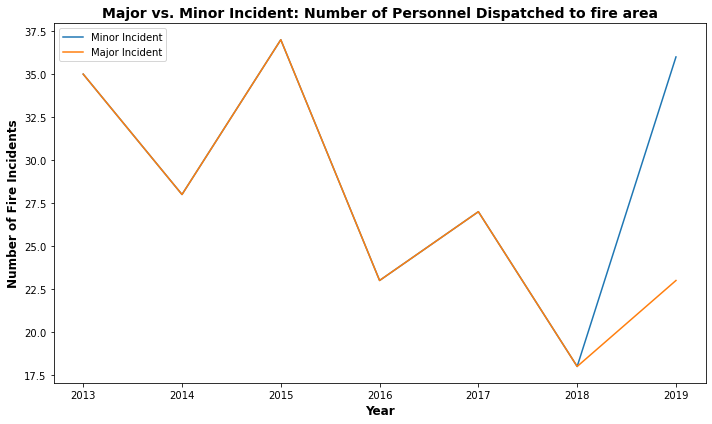

In [62]:
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(resources_personnel_count.index.values, resources_personnel_count.values)
ax.plot(resources_personnel_major_count.index.values, resources_personnel_major_count.values)
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Number of Fire Incidents", fontsize=12, fontweight='bold')
plt.title("Major vs. Minor Incident: Number of Personnel Dispatched to fire area", fontsize=14, fontweight='bold')
ax.legend(["Minor Incident", "Major Incident"])

plt.tight_layout()
plt.savefig('Images/major_minor.png')

plt.show()

### Correlation

In [63]:
# Duplicated data removed process
mj_final_burned_df = major_fire_df.drop_duplicates(subset=['UniqueId', 'Days Burned','AcresBurned'])

In [64]:
# Correlation for major all data
df_corr_maj = mj_final_burned_df.corr(method='pearson')

# Export to excel
df_corr_maj.to_excel('output_data/major_correlation.xlsx', engine='xlsxwriter')

df_corr_maj.head()

,AcresBurned,AirTankers,CrewsInvolved,Dozers,Engines,Fatalities,Helicopters,Injuries,Latitude,Longitude,...,AvgEngines,AvgFatalities,AvgHelicopters,AvgInjuries,AvgPersonnelInvolved,AvgStructuresDamaged,AvgStructuresDestroyed,AvgStructuresEvacuated,AvgStructuresThreatened,AvgWaterTenders
AcresBurned,1.000000,0.079609,0.074270,0.397991,0.225773,0.119278,0.030979,0.010166,0.060602,-0.061281,...,0.188601,0.126649,-0.017645,-0.029651,0.185365,0.390046,0.274272,NaN,-0.011934,0.155430
AirTankers,0.079609,1.000000,0.602434,0.774488,0.418877,NaN,0.824106,0.799003,-0.007303,-0.035059,...,0.418877,NaN,0.824106,0.799003,0.422732,0.881895,0.537996,NaN,-0.076033,0.800749
CrewsInvolved,0.074270,0.602434,1.000000,0.637784,0.743046,0.676507,0.684007,0.479059,-0.042822,0.012717,...,0.736184,0.684758,0.635362,0.477878,0.789650,-0.129255,-0.021551,NaN,0.174583,0.775439
Dozers,0.397991,0.774488,0.637784,1.000000,0.684305,-0.498782,0.766838,0.230624,0.086999,-0.095304,...,0.505068,-0.512323,0.632537,0.244295,0.489442,0.095026,-0.048568,NaN,0.025299,0.794895
Engines,0.225773,0.418877,0.743046,0.684305,1.000000,0.995691,0.493250,0.652464,-0.014949,-0.021039,...,0.929205,0.996771,0.387665,0.653774,0.835717,-0.036069,0.101540,NaN,0.123541,0.675227


#### Structures Damaged vs Air Tankers

In [65]:
# Drop Null from column of interest
mj_dam_air = mj_final_burned_df.dropna(how='any', subset=['StructuresDamaged', 'AirTankers'])

Number of data is: 3
The correlation between number of air tankers and structures damaged is 0.88189
The r-squared is: 0.77774


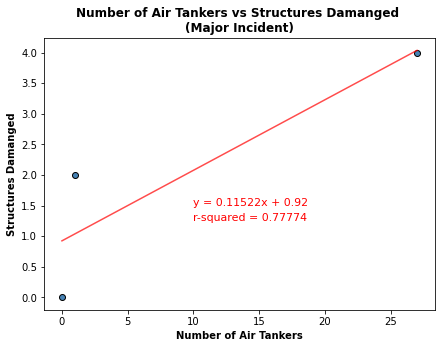

In [66]:
# Number of data
num_data_damair = mj_dam_air['AirTankers'].count()
print(f'Number of data is: {num_data_damair}')

# Get data from dataframe to plot
mj_dam = mj_dam_air['StructuresDamaged']
mj_air = mj_dam_air['AirTankers']

# Define x, y values
damair_x_values = mj_dam
damair_y_values = mj_air

# Calculate the correlation
damair_correlation = round(st.pearsonr(damair_x_values, damair_y_values)[0],5)
print(f"The correlation between number of air tankers and structures damaged is {damair_correlation}")

# Calculate linear regression values
(damair_slope, damair_intercept, damair_rvalue, damair_pvalue, damair_stderr) = st.linregress(damair_x_values, damair_y_values) 
                                                                                                   
# Calculate r-squared
damair_r_squared = round(damair_rvalue**2,5)
print(f"The r-squared is: {damair_r_squared}")

# y = mx + b
damair_regress_values = damair_x_values * damair_slope + damair_intercept
damair_line_eq = "y = " + str(round(damair_slope,5)) + "x + " + str(round(damair_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(damair_x_values, damair_y_values, edgecolors='black', color='steelblue')
plt.plot(damair_x_values, damair_regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(damair_line_eq,(10,1.5), fontsize=11, color="red")
plt.annotate(f'r-squared = {damair_r_squared}', (10,1.25), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Number of Air Tankers vs Structures Damanged \n(Major Incident)', fontweight='bold')
plt.xlabel('Number of Air Tankers', fontweight='bold')
plt.ylabel('Structures Damanged', fontweight='bold')

# Set image size
plt.rcParams["figure.figsize"] = (7,5)

# Save box plot graph to Images folder
plt.savefig('Images/mj_dam_air.png')

# Present the box plot chart
plt.show()

#### Personnel Involved vs Fatalities

In [67]:
# Drop Null from column of interest
mj_per_fat = mj_final_burned_df.dropna(how='any', subset=['PersonnelInvolved', 'Fatalities'])

Number of data is: 6
The correlation between number of personnel involved and fatalities is 0.93008
The r-squared is: 0.86504


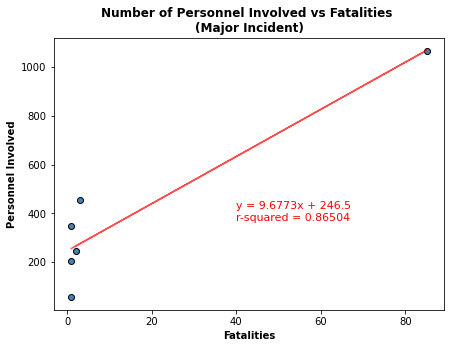

In [68]:
# Number of data
num_data_perfat = mj_per_fat['PersonnelInvolved'].count()
print(f'Number of data is: {num_data_perfat}')

# Get data from dataframe to plot
mj_per = mj_per_fat['PersonnelInvolved']
mj_fat = mj_per_fat['Fatalities']

# Define x, y values
perfat_x_values = mj_fat
perfat_y_values = mj_per

# Calculate the correlation
perfat_correlation = round(st.pearsonr(perfat_x_values, perfat_y_values)[0],5)
print(f"The correlation between number of personnel involved and fatalities is {perfat_correlation}")

# Calculate linear regression values
(perfat_slope, perfat_intercept, perfat_rvalue, perfat_pvalue, perfat_stderr) = st.linregress(perfat_x_values, perfat_y_values) 
                                                                                                   
# Calculate r-squared
perfat_r_squared = round(perfat_rvalue**2,5)
print(f"The r-squared is: {perfat_r_squared}")

# y = mx + b
perfat_regress_values = perfat_x_values * perfat_slope + perfat_intercept
perfat_line_eq = "y = " + str(round(perfat_slope,5)) + "x + " + str(round(perfat_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(perfat_x_values, perfat_y_values, edgecolors='black', color='steelblue')
plt.plot(perfat_x_values, perfat_regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(perfat_line_eq,(40,420), fontsize=11, color="red")
plt.annotate(f'r-squared = {perfat_r_squared}', (40,370), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Number of Personnel Involved vs Fatalities \n(Major Incident)', fontweight='bold')
plt.xlabel('Fatalities', fontweight='bold')
plt.ylabel('Personnel Involved', fontweight='bold')

# Set image size
plt.rcParams["figure.figsize"] = (7,5)

# Save box plot graph to Images folder
plt.savefig('Images/mj_per_fat.png')

# Present the box plot chart
plt.show()

#### By County

*Resources involved per county*

In [69]:
# Calculation per county
maj_fire_count = major_fire_df.groupby(["Counties"])["UniqueId"].nunique()
maj_fire_area = major_fire_df.groupby('Counties')['AvgAcresBurned'].sum()
maj_days_burned = major_fire_df.groupby(["Counties"])["Days Burned"].sum()
maj_air = major_fire_df.groupby('Counties')['AvgAirTankers'].sum()
crew_count = major_fire_df.groupby(["Counties"])["AvgCrewsInvolved"].sum()
dozer_count = major_fire_df.groupby(["Counties"])["AvgDozers"].sum()
engine_count = major_fire_df.groupby(["Counties"])["AvgEngines"].sum()
maj_fat = major_fire_df.groupby('Counties')['AvgFatalities'].sum()
helicopter_count = major_fire_df.groupby(["Counties"])["AvgHelicopters"].sum()
maj_inju = major_fire_df.groupby('Counties')['AvgInjuries'].sum()
personnel_count = major_fire_df.groupby(["Counties"])["AvgPersonnelInvolved"].sum()
maj_dam = major_fire_df.groupby('Counties')['AvgStructuresDamaged'].sum()
maj_des = major_fire_df.groupby('Counties')['AvgStructuresDestroyed'].sum()
maj_thre = major_fire_df.groupby('Counties')['AvgStructuresThreatened'].sum()
water_tender_count = major_fire_df.groupby(["Counties"])["AvgWaterTenders"].sum()

# Put data into data frame
major_fire_county_df = pd.DataFrame({
    'Number of Fire Incident': maj_fire_count,
    'Area Burned (acres)': maj_fire_area,
    'Day Burned (days)': maj_days_burned,
    'Air Tanker': maj_air,
    'Crews': crew_count,
    'Dozers': dozer_count,
    'Engines': engine_count,
    'Fatalities': maj_fat,
    'Helicopters': helicopter_count,
    'Injuries': maj_inju,
    'Personnel Involved': personnel_count,
    'StructuresDamaged': maj_dam,
    'StructuresDestroyed': maj_des,
    'StructuresThreatened': maj_thre,
    'WaterTenders': water_tender_count
})

major_fire_county_df.head()

,Number of Fire Incident,Area Burned (acres),Day Burned (days),Air Tanker,Crews,Dozers,Engines,Fatalities,Helicopters,Injuries,Personnel Involved,StructuresDamaged,StructuresDestroyed,StructuresThreatened,WaterTenders
Counties,,,,,,,,,,,,,,,
Alameda,2,3340.000000,183.0,0.0,0.000000,0.000000,5.000000,0.00,0.000000,0.00,18.000000,0.0,0.000000,0.000000,1.000000
Amador,8,3610.000000,198.0,4.0,14.500000,7.000000,60.500000,0.00,3.000000,2.00,215.000000,0.0,34.500000,0.000000,15.500000
Butte,28,182871.000000,1597.0,14.0,135.000000,75.000000,395.000000,85.00,32.000000,21.00,6071.000000,63.0,18967.000000,0.000000,88.000000
Calaveras,10,1221.000000,657.0,0.0,18.000000,18.000000,35.000000,0.00,18.000000,4.00,189.000000,1.0,9.000000,0.000000,18.000000
Colusa,6,119029.416667,686.0,0.0,24.333333,31.333333,102.333333,0.25,9.666667,0.75,1174.333333,0.0,73.166667,604.166667,31.333333


In [70]:
# Correlation for all data
df_corr_maj_county = major_fire_county_df.corr(method='pearson')

# Export to excel
df_corr_maj_county.to_excel('output_data/major_county_correlation.xlsx', engine='xlsxwriter')

In [71]:
df_corr_maj_county

,Number of Fire Incident,Area Burned (acres),Day Burned (days),Air Tanker,Crews,Dozers,Engines,Fatalities,Helicopters,Injuries,Personnel Involved,StructuresDamaged,StructuresDestroyed,StructuresThreatened,WaterTenders
Number of Fire Incident,1.000000,0.557270,0.900034,0.530772,0.730747,0.793353,0.772115,0.468599,0.686476,0.735952,0.735040,0.204112,0.499987,0.102106,0.812320
Area Burned (acres),0.557270,1.000000,0.681442,0.014809,0.321417,0.383771,0.356393,0.356182,0.171222,0.397094,0.336181,0.403486,0.405681,0.237878,0.388525
Day Burned (days),0.900034,0.681442,1.000000,0.425234,0.635503,0.667373,0.645762,0.376278,0.554729,0.640888,0.649300,0.290765,0.412996,0.238134,0.704200
Air Tanker,0.530772,0.014809,0.425234,1.000000,0.606757,0.598814,0.585376,0.207531,0.729281,0.447897,0.679161,0.117180,0.218821,-0.036255,0.586828
Crews,0.730747,0.321417,0.635503,0.606757,1.000000,0.883370,0.909911,0.297427,0.889351,0.688593,0.941699,0.033442,0.326064,-0.096485,0.906784
Dozers,0.793353,0.383771,0.667373,0.598814,0.883370,1.000000,0.854523,0.411109,0.854363,0.647210,0.877875,-0.056801,0.428344,-0.014258,0.964074
Engines,0.772115,0.356393,0.645762,0.585376,0.909911,0.854523,1.000000,0.416373,0.818128,0.710235,0.945342,0.067292,0.431328,-0.043242,0.861630
Fatalities,0.468599,0.356182,0.376278,0.207531,0.297427,0.411109,0.416373,1.000000,0.227500,0.198318,0.418485,0.196806,0.990487,-0.072556,0.382376
Helicopters,0.686476,0.171222,0.554729,0.729281,0.889351,0.854363,0.818128,0.227500,1.000000,0.658415,0.882285,-0.013621,0.250929,-0.086783,0.892255
Injuries,0.735952,0.397094,0.640888,0.447897,0.688593,0.647210,0.710235,0.198318,0.658415,1.000000,0.663542,0.015832,0.211453,0.024763,0.704549


#### Number of major fire incidents vs Area burned

Number of data is: 49
The correlation between number of major fire incidents and area burned is 0.55727
The r-squared is: 0.31055


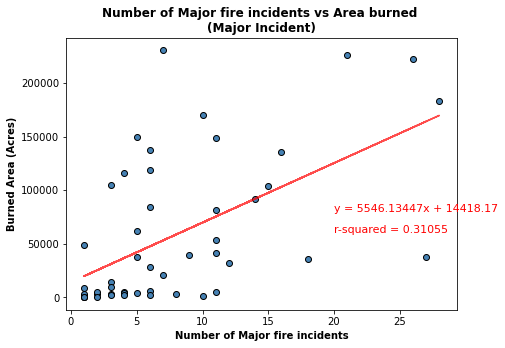

In [72]:
# Number of data
maj_numarea = major_fire_county_df['Number of Fire Incident'].count()
print(f'Number of data is: {maj_numarea}')

# Get data from dataframe to plot
mj_num = major_fire_county_df['Number of Fire Incident']
mj_area = major_fire_county_df['Area Burned (acres)']

# Define x, y values
mj_numarea_x_values = mj_num
mj_numarea_y_values = mj_area

# Calculate the correlation
mj_num_area_correlation = round(st.pearsonr(mj_numarea_x_values, mj_numarea_y_values)[0],5)
print(f"The correlation between number of major fire incidents and area burned is {mj_num_area_correlation}")

# Calculate linear regression values
(mj_numarea_slope, mj_numarea_intercept, mj_numarea_rvalue, mj_numarea_pvalue, mj_numarea_stderr) = st.linregress(mj_numarea_x_values, mj_numarea_y_values) 
                                                                                                   
# Calculate r-squared
mj_numarea_r_squared = round(mj_numarea_rvalue**2,5)
print(f"The r-squared is: {mj_numarea_r_squared}")

# y = mx + b
mj_numarea_regress_values = mj_numarea_x_values * mj_numarea_slope + mj_numarea_intercept
mj_numarea_line_eq = "y = " + str(round(mj_numarea_slope,5)) + "x + " + str(round(mj_numarea_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(mj_numarea_x_values, mj_numarea_y_values, edgecolors='black', color='steelblue')
plt.plot(mj_numarea_x_values, mj_numarea_regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(mj_numarea_line_eq,(20,80000), fontsize=11, color="red")
plt.annotate(f'r-squared = {mj_numarea_r_squared}', (20,60000), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Number of Major fire incidents vs Area burned \n(Major Incident)', fontweight='bold')
plt.xlabel('Number of Major fire incidents', fontweight='bold')
plt.ylabel('Burned Area (Acres)', fontweight='bold')

# Set image size
plt.rcParams["figure.figsize"] = (7,5)

# Save box plot graph to Images folder
plt.savefig('Images/mj_area_num.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

#### Number of day burned vs personnel involved

Number of data is: 49
The correlation between number of personnel involved and day burned is 0.6493
The r-squared is: 0.42159


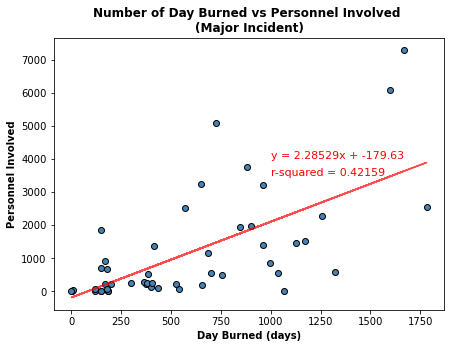

In [74]:
# Number of data
maj_perday = major_fire_county_df['Day Burned (days)'].count()
print(f'Number of data is: {maj_perday}')

# Get data from dataframe to plot
mj_per = major_fire_county_df['Personnel Involved']
mj_days = major_fire_county_df['Day Burned (days)']

# Define x, y values
mj_perday_x_values = mj_days
mj_perday_y_values = mj_per

# Calculate the correlation
mj_per_days_correlation = round(st.pearsonr(mj_perday_x_values, mj_perday_y_values)[0],5)
print(f"The correlation between number of personnel involved and day burned is {mj_per_days_correlation}")

# Calculate linear regression values
(mj_perday_slope, mj_perday_intercept, mj_perday_rvalue, mj_perday_pvalue, mj_perday_stderr) = st.linregress(mj_perday_x_values, mj_perday_y_values) 
                                                                                                   
# Calculate r-squared
mj_perday_r_squared = round(mj_perday_rvalue**2,5)
print(f"The r-squared is: {mj_perday_r_squared}")

# y = mx + b
mj_perday_regress_values = mj_perday_x_values * mj_perday_slope + mj_perday_intercept
mj_perday_line_eq = "y = " + str(round(mj_perday_slope,5)) + "x + " + str(round(mj_perday_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(mj_perday_x_values, mj_perday_y_values, edgecolors='black', color='steelblue')
plt.plot(mj_perday_x_values, mj_perday_regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(mj_perday_line_eq,(1000,4000), fontsize=11, color="red")
plt.annotate(f'r-squared = {mj_perday_r_squared}', (1000,3500), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Number of Day Burned vs Personnel Involved \n(Major Incident)', fontweight='bold')
plt.xlabel('Day Burned (days)', fontweight='bold')
plt.ylabel('Personnel Involved', fontweight='bold')

# Set image size
plt.rcParams["figure.figsize"] = (7,5)

# Save box plot graph to Images folder
plt.savefig('Images/mj_day_per.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

In [127]:
df_corr_maj_county.loc[['Air Tanker', 'Crews', 'Dozers', 'Engines', 'Helicopters', 'WaterTenders'],['Personnel Involved']]

,Personnel Involved
Air Tanker,0.679161
Crews,0.941699
Dozers,0.877875
Engines,0.945342
Helicopters,0.882285
WaterTenders,0.909159


Number of data is: 49
The correlation between number of fire incidents and area burned is 0.66354
The r-squared is: 0.44029


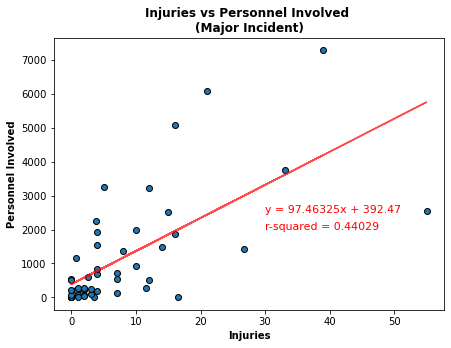

In [76]:
# Number of data
num_data_injper = major_fire_county_df['Personnel Involved'].count()
print(f'Number of data is: {num_data_injper}')

# Get data from dataframe to plot
per_fire = major_fire_county_df['Personnel Involved']
inj_fire = major_fire_county_df['Injuries']

# Define x, y values
injper_x_values = inj_fire
injper_y_values = per_fire

# Calculate the correlation
injper_correlation = round(st.pearsonr(injper_x_values, injper_y_values)[0],5)
print(f"The correlation between number of fire incidents and area burned is {injper_correlation}")

# Calculate linear regression values
(injper_slope, injper_intercept, injper_rvalue, injper_pvalue, injper_stderr) = st.linregress(injper_x_values, injper_y_values) 
                                                                                                   
# Calculate r-squared
injper_r_squared = round(injper_rvalue**2,5)
print(f"The r-squared is: {injper_r_squared}")

# y = mx + b
injper_regress_values = injper_x_values * injper_slope + injper_intercept
injper_line_eq = "y = " + str(round(injper_slope,5)) + "x + " + str(round(injper_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(injper_x_values, injper_y_values, edgecolors='black')
plt.plot(injper_x_values, injper_regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(injper_line_eq,(30,2500), fontsize=11, color="red")
plt.annotate(f'r-squared = {injper_r_squared}', (30,2000), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Injuries vs Personnel Involved \n(Major Incident)', fontweight='bold')
plt.xlabel('Injuries', fontweight='bold')
plt.ylabel('Personnel Involved', fontweight='bold')

# Set image size
plt.rcParams["figure.figsize"] = (7,5)

# Save box plot graph to Images folder
plt.savefig('Images/mj_per_inj.png')

# Present the box plot chart
plt.show()

#### Resources involved per county

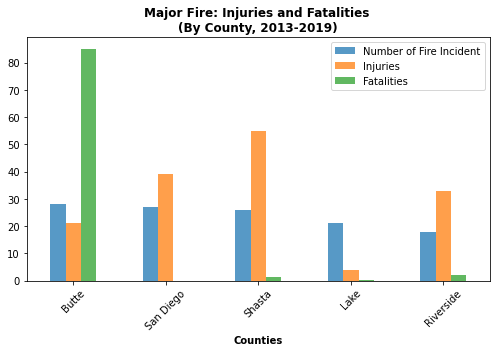

In [85]:
# Bar chart to visualize the injuries and fatalities vs. major fire counts by county #sort by fatalities
human_county_df = major_fire_county_df[["Number of Fire Incident","Injuries","Fatalities"]]
human_sorted = human_county_df.sort_values(by= ["Number of Fire Incident","Fatalities"], ascending= False)
human_toll_visual = human_sorted.head(5)

human_toll_visual.plot(kind="bar", stacked=False, rot=45, alpha=0.75, figsize=(7,5))

plt.title("Major Fire: Injuries and Fatalities \n(By County, 2013-2019)", fontweight='bold')
plt.xlabel("No. of Injuries/Fatalities", fontweight='bold')
plt.xlabel("Counties", fontweight='bold')
plt.tight_layout()
plt.savefig("Images/Bar_Chart_County_Fire_Count_Injuries_Fatalities.png")
plt.show()

In [78]:
#list of county names
county_names = major_fire_df["Counties"].unique()

#count unique fires with UniqueID
maj_fire_count = major_fire_df.groupby("Counties")["UniqueId"].nunique()

#count days burned 
days_burned = major_fire_df.groupby("Counties")["Days Burned"].sum()

#count 'Helicopters' involved
helicopter_count = major_fire_df.groupby("Counties")["AvgHelicopters"].sum()

#count dozers involved
dozer_count = major_fire_df.groupby("Counties")["AvgDozers"].sum()

#count engines involved 
engine_count = major_fire_df.groupby("Counties")["AvgEngines"].sum()

#count water tankers involved
water_tender_count = major_fire_df.groupby("Counties")["AvgWaterTenders"].sum()

#count personnel involved 
personnel_count = major_fire_df.groupby("Counties")["AvgPersonnelInvolved"].sum()

#count crews involved
crew_count = major_fire_df.groupby("Counties")["AvgCrewsInvolved"].sum()

#total equipment involved, found with average columns
total_equipment = helicopter_count + dozer_count + engine_count + water_tender_count 

#create a new dataframe 
resources_df = pd.DataFrame({"Major Fire Count": maj_fire_count, 
                            "Days Burned": days_burned,
                            "Helicopters": helicopter_count,
                            "Dozers": dozer_count, 
                            "Engines": engine_count, 
                            "Water Tenders": water_tender_count, 
                            "Personnel Involved": personnel_count,
                            "Crews Involved": crew_count, 
                            "Total Equipment": total_equipment})

resources_df

resources_df_sorted = resources_df.sort_values(by= ["Major Fire Count","Total Equipment"], ascending= False)
mj_resouces = resources_df_sorted.head(5).round(2)

mj_resouces

,Major Fire Count,Days Burned,Helicopters,Dozers,Engines,Water Tenders,Personnel Involved,Crews Involved,Total Equipment
Counties,,,,,,,,,
Butte,28,1597.0,32.00,75.00,395.00,88.00,6071.00,135.00,590.00
San Diego,27,1671.0,72.00,83.00,399.00,101.00,7278.00,193.00,655.00
Shasta,26,1782.0,28.00,54.00,197.50,79.50,2540.00,100.50,359.00
Lake,21,1258.0,9.67,58.33,198.33,52.33,2266.33,57.33,318.67
Riverside,18,882.0,31.00,37.00,416.00,38.00,3750.00,138.00,522.00


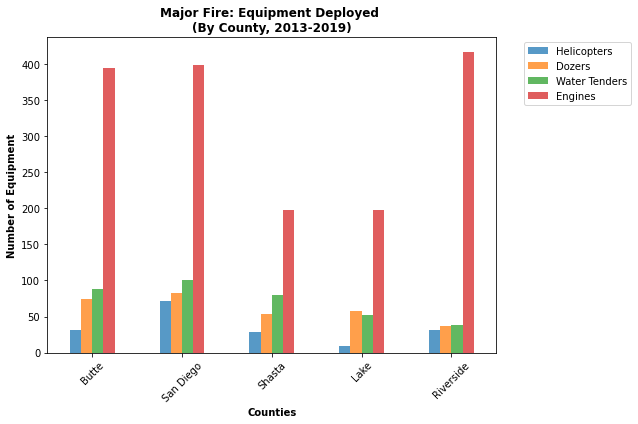

In [97]:
# Graph the resources used by county
equipment_county_df = mj_resouces[["Helicopters","Dozers","Water Tenders","Engines"]]
equipment_county_df.plot(kind="bar", stacked=False, rot=45, alpha=0.75, figsize=(9,6))

# Set title, x/y label and legend
plt.title("Major Fire: Equipment Deployed \n(By County, 2013-2019)", fontweight = 'bold')
plt.xlabel("Counties", fontweight = 'bold')
plt.ylabel("Number of Equipment", fontweight = 'bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='best')

plt.tight_layout()

# Save figure
plt.savefig("Images/Bar_Chart_Equipment_Top_Five_Counties.png")
plt.show()

### Fire Map

In [98]:
# Store latitude and longitude in locations
location_df = ca_fire_df.loc[(ca_fire_df['Latitude']>=-90) & (ca_fire_df['Latitude']<=90)
                             & (ca_fire_df['Longitude']>=-180) & (ca_fire_df['Longitude']<=180)]
locations = location_df[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
burned_area = location_df["AcresBurned"].astype(float)

In [99]:
# Plot Heatmap
fig = gmaps.figure(center=(37, -118), zoom_level=5.25)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=burned_area, 
                                 dissipating=True, max_intensity=5,
                                 point_radius=2)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [100]:
# Fire indicated major incident = True based on dataset
major_df_select = major_fire_df[major_fire_df.Longitude<-115]

# some of the code came from: https://www.kaggle.com/docxian/wildfires-geospatial-visualization-and-eda

zoom_factor = 5 # inital map size
radius_scaling = 50 # scaling of bubbles

my_map_1 = folium.Map(location=[36,-120], zoom_start=zoom_factor)

for i in range(0,major_df_select.shape[0]):
   folium.Circle(
      location=[major_df_select.iloc[i]['Latitude'], major_df_select.iloc[i]['Longitude']],
      radius=np.sqrt(major_df_select.iloc[i]['AcresBurned'])*radius_scaling,
      color='red',
      popup='CanonicalUrl:' + str(int(major_df_select.iloc[i]['ArchiveYear'])) + ' - Acres Burned:' 
      + str(major_df_select.iloc[i]['AcresBurned']),
      tooltip=str,
       fill=True,
      fill_color='yellow'
   ).add_to(my_map_1)


my_map_1

In [101]:
# Displaying Fires burning more than 10 acres based on California Fire Department definition
all_fire_df_select = ca_fire_df.loc[ca_fire_df['AvgAcresBurned']>=10]

In [102]:
# some of the code came from: https://www.kaggle.com/docxian/wildfires-geospatial-visualization-and-eda
zoom_factor = 5 # inital map size
radius_scaling = 50 # scaling of bubbles

my_map_3 = folium.Map(location=[36,-120], zoom_start=zoom_factor)

for i in range(0,all_fire_df_select.shape[0]):
   folium.Circle(
      location=[all_fire_df_select.iloc[i]['Latitude'], all_fire_df_select.iloc[i]['Longitude']],
      radius=np.sqrt(all_fire_df_select.iloc[i]['AcresBurned'])*radius_scaling,
      color='red',
      fill=True,
      fill_color='lightyellow'
   ).add_to(my_map_3)

my_map_3 # display

In [103]:
# use heatmap
my_map_2 = folium.Map(location=[36,-120], zoom_start=zoom_factor)
HeatMap(data=major_df_select[['Latitude', 'Longitude']], radius=10, legend_name="AcresBurned").add_to(my_map_2)

my_map_2 # display
#didn't display legend_name

In [104]:
# some of the code came from: https://www.kaggle.com/docxian/wildfires-geospatial-visualization-and-eda

# For minor fire incident
df=pd.DataFrame({"Latitude" : [38.59, 32.85, 37.77],
                "Longitude" : [-119.88, -115.17, -122.42],
                "Area" : [739, 4175, 47]},
               index = ['Alpine', 'Imperial', 'San_Francisco'])
# Counties with no Acreage burned
zoom_factor = 5 # inital map size
# radius_scaling = 50 # scaling of bubbles

my_map_1 = folium.Map(location=[36,-120], zoom_start=zoom_factor)

for i in range(0,df.shape[0]):
   folium.Circle(
      location=[df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
      radius=(df.iloc[i]['Area']*15),
      color='purple',
      popup=str(df.iloc[i]['Area']),
      tooltip=str,
       fill=True,
   ).add_to(my_map_1)

my_map_1 # display
# fill_color='purple'
#np.sqrt*radius_scaling